In [1]:

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier,VotingClassifier,BaggingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import make_classification
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report


# Load the data
data = pd.read_csv('hotel_booking.csv')
pre_processed_data=data

In [26]:
import Algoritmos
from importlib import reload
reload(Algoritmos)
alg=Algoritmos.Algoritmos()


In [3]:
#1. Data Exploration and Preparation

# Get a Summary of Data
describe = data.describe()
print("\n"+ str(describe))

# Get information about the data
hotel_data_info = data.info()
# Size
size = data.size
print('O tamanho do data set é: ' + str(size))


         is_canceled      lead_time  arrival_date_year  \
count  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416        2016.156554   
std         0.482918     106.863097           0.707476   
min         0.000000       0.000000        2015.000000   
25%         0.000000      18.000000        2016.000000   
50%         0.000000      69.000000        2016.000000   
75%         1.000000     160.000000        2017.000000   
max         1.000000     737.000000        2017.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000           

In [4]:
# View the first rows of the data set and then the last rows
first = data.head()
last = data.tail()
print("The first rows are:\n" + str(first) + "\n The last rows are: \n" + str(last))

The first rows are:
          hotel  is_canceled  lead_time  arrival_date_year arrival_date_month  \
0  Resort Hotel            0        342               2015               July   
1  Resort Hotel            0        737               2015               July   
2  Resort Hotel            0          7               2015               July   
3  Resort Hotel            0         13               2015               July   
4  Resort Hotel            0         14               2015               July   

   arrival_date_week_number  arrival_date_day_of_month  \
0                        27                          1   
1                        27                          1   
2                        27                          1   
3                        27                          1   
4                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  ...  customer_type  \
0                        0                     0       2  ...   

In [4]:
# Check which columns are Numeric and which are Categorical
dtypes = data.dtypes
print("Os data types são: \n" + str(dtypes) )

Os data types são: 
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults                              int64
children                          float64
babies                              int64
meal                               object
country                            object
market_segment                     object
distribution_channel               object
is_repeated_guest                   int64
previous_cancellations              int64
previous_bookings_not_canceled      int64
reserved_room_type                 object
assigned_room_type                 object
booking_changes                     int64
deposit_type                       object
agent         

In [5]:
# Number of rows
linhas = len(data)
print("Number of rows: " + str(linhas))

# Number of collumns
colunas = len(data.columns)
print("Number of columns: " + str(colunas))

# Collumns Names
col_names = data.columns
print(col_names)

Number of rows: 119390
Number of columns: 36
Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'name', 'email',
       'phone-number', 'credit_card'],
      dtype='object')


In [6]:
# Display the number of missing values in each column sorted in ascending order
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")

print(f"Number of duplicate rows: {data.duplicated().sum()}")


Number of nulls per column: company                           112593
agent                              16340
country                              488
children                               4
arrival_date_year                      0
lead_time                              0
is_canceled                            0
hotel                                  0
stays_in_weekend_nights                0
stays_in_week_nights                   0
arrival_date_day_of_month              0
arrival_date_month                     0
babies                                 0
meal                                   0
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
adults                                 0
arrival_date_week_number               0
reserved_room_type                     0
previous_bookings_not_canceled         0
booking_changes                        0
assigned_room_type           

In [7]:
# Assign a placeholder for missing values
data.fillna(value={'children': -1, 'country': 'Missing', 'agent': 'Missing', 'company': 'No Company'}, inplace=True)
data.info()
print(f"Number of nulls per column: {data.isnull().sum().sort_values(ascending=False)}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [8]:
# Verify if have duplicate rows
print(size)
df_duplicates = data.drop_duplicates(inplace = True)
print(data.size) # Doesn't have duplicate rows

# Check for unique values
unique_values = data.nunique()
print(unique_values)

4298040
4298040
hotel                                  2
is_canceled                            2
lead_time                            479
arrival_date_year                      3
arrival_date_month                    12
arrival_date_week_number              53
arrival_date_day_of_month             31
stays_in_weekend_nights               17
stays_in_week_nights                  35
adults                                14
children                               6
babies                                 5
meal                                   5
country                              178
market_segment                         8
distribution_channel                   5
is_repeated_guest                      2
previous_cancellations                15
previous_bookings_not_canceled        73
reserved_room_type                    10
assigned_room_type                    12
booking_changes                       21
deposit_type                           3
agent                                334


In [9]:
#Elimnate columns that are not useful
data = data.drop(['company', 'agent','name','email','phone-number','credit_card', 'reservation_status_date'], axis=1)

In [10]:
# Separate columns into categorical and numerical
categorical_columns = data.select_dtypes(include=['object']).columns.tolist()
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()

# Display the separated columns
print("Categorical Columns:")
print(categorical_columns)
print("\nNumerical Columns:")
print(numerical_columns)

# Check the data types of each column
print(data.dtypes)
data.info()


Categorical Columns:
['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']

Numerical Columns:
['is_canceled', 'lead_time', 'arrival_date_year', 'arrival_date_week_number', 'arrival_date_day_of_month', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children', 'babies', 'is_repeated_guest', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes', 'days_in_waiting_list', 'adr', 'required_car_parking_spaces', 'total_of_special_requests']
hotel                              object
is_canceled                         int64
lead_time                           int64
arrival_date_year                   int64
arrival_date_month                 object
arrival_date_week_number            int64
arrival_date_day_of_month           int64
stays_in_weekend_nights             int64
stays_in_week_nights                int64
adults  

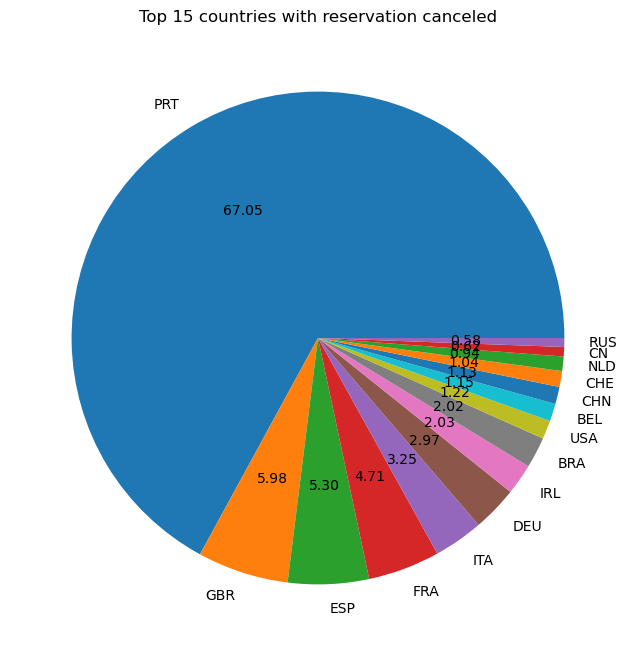

In [12]:
# Visualize top 10 countries with reservation canceled
cancelled_data= data[data['is_canceled']==1]
top_10_country = cancelled_data['country'].value_counts()[:15]


plt.figure(figsize=(8, 8))  # Set background color to a light brown
plt.title('Top 15 countries with reservation canceled', color="black")
plt.pie(top_10_country, autopct='%.2f', labels=top_10_country.index,)
plt.show()

Categorical columns: ['hotel', 'arrival_date_month', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'assigned_room_type', 'deposit_type', 'customer_type', 'reservation_status']


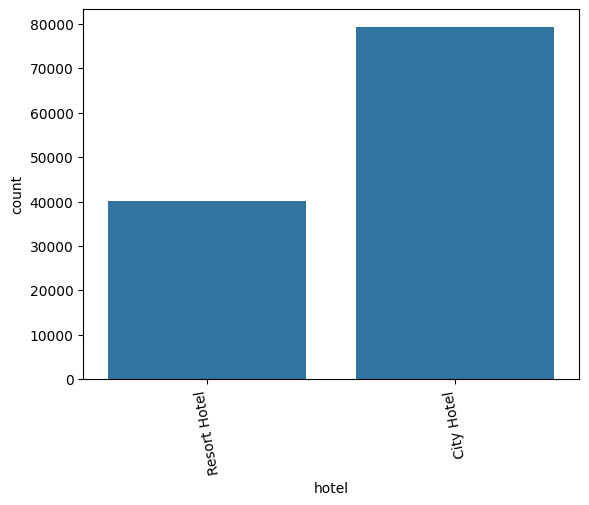

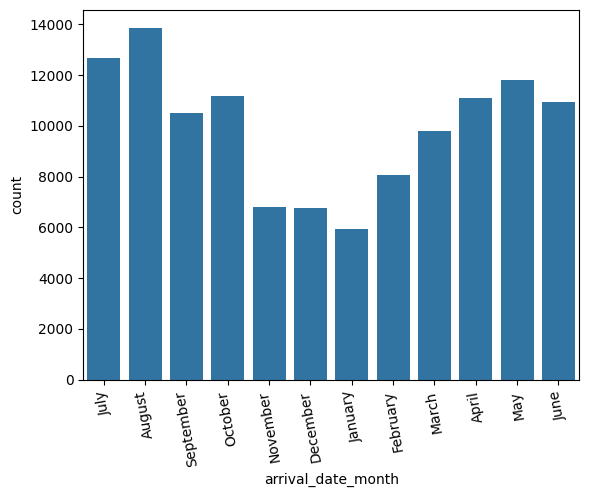

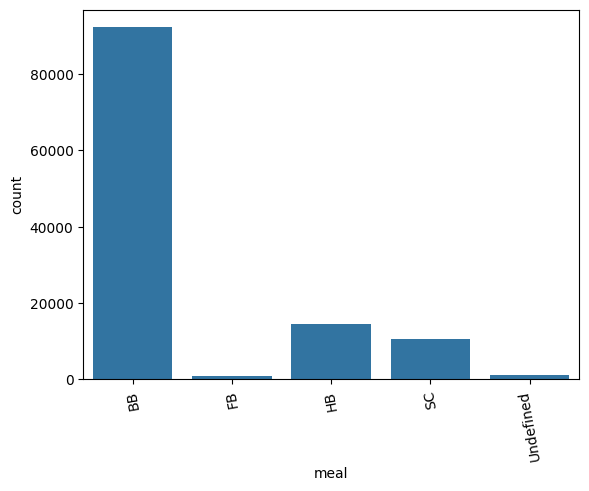

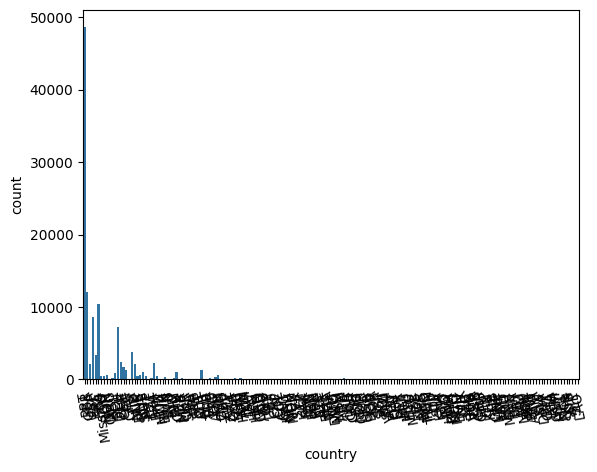

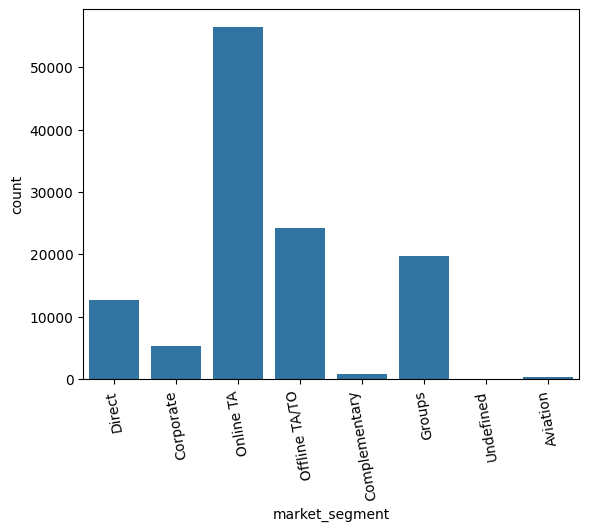

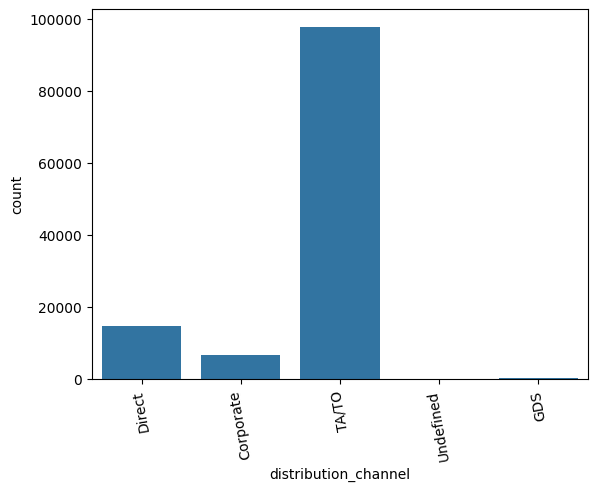

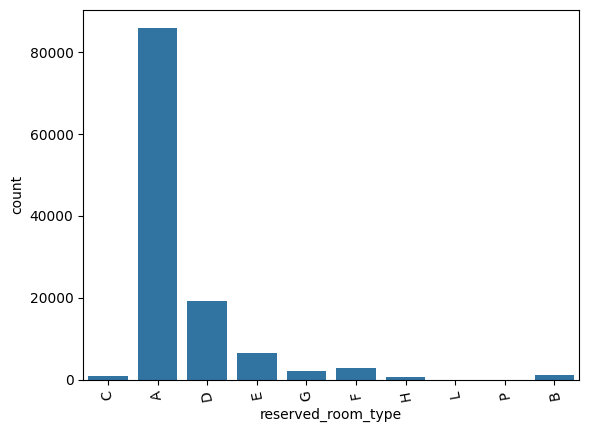

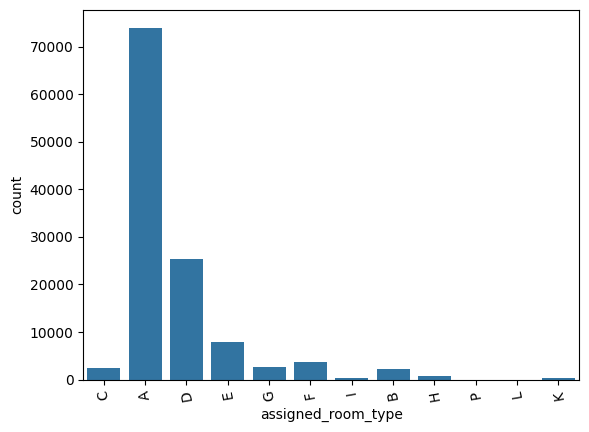

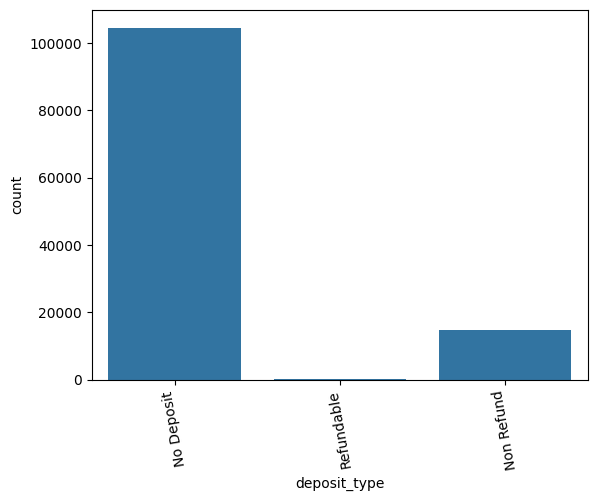

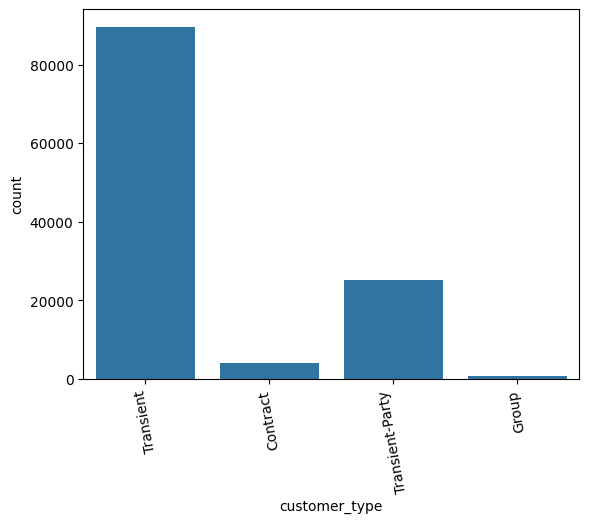

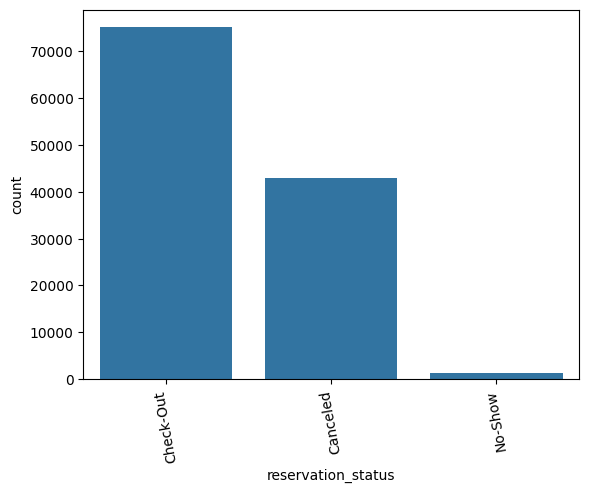

In [11]:
# Get categorical columns
categorical_columns = data.select_dtypes(include = ['object']).columns.tolist()
print("Categorical columns: " + str(categorical_columns))

for column in categorical_columns:
    sns.countplot(data=data, x=column)
    plt.xticks(rotation=100)
    plt.show()


In [12]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Convert non-numeric columns to values
for column in categorical_columns:
    # Convert the column to string type to avoid type conflicts
    data[column] = data[column].astype(str)
    # Apply LabelEncoder
    data[column] = label_encoder.fit_transform(data[column])

print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int64  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int64  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [13]:
print(data['is_canceled'].info())

<class 'pandas.core.series.Series'>
RangeIndex: 119390 entries, 0 to 119389
Series name: is_canceled
Non-Null Count   Dtype
--------------   -----
119390 non-null  int64
dtypes: int64(1)
memory usage: 932.9 KB
None


                                is_canceled  lead_time  arrival_date_year  \
is_canceled                        1.000000   0.293123           0.016660   
lead_time                          0.293123   1.000000           0.040142   
arrival_date_year                  0.016660   0.040142           1.000000   
arrival_date_week_number           0.008148   0.126871          -0.540561   
arrival_date_day_of_month         -0.006130   0.002268          -0.000221   
stays_in_weekend_nights           -0.001791   0.085671           0.021497   
stays_in_week_nights               0.024765   0.165799           0.030883   
adults                             0.060017   0.119519           0.029635   
children                           0.004926  -0.037529           0.054766   
babies                            -0.032491  -0.020915          -0.013192   
is_repeated_guest                 -0.084793  -0.124410           0.010341   
previous_cancellations             0.110133   0.086042          -0.119822   

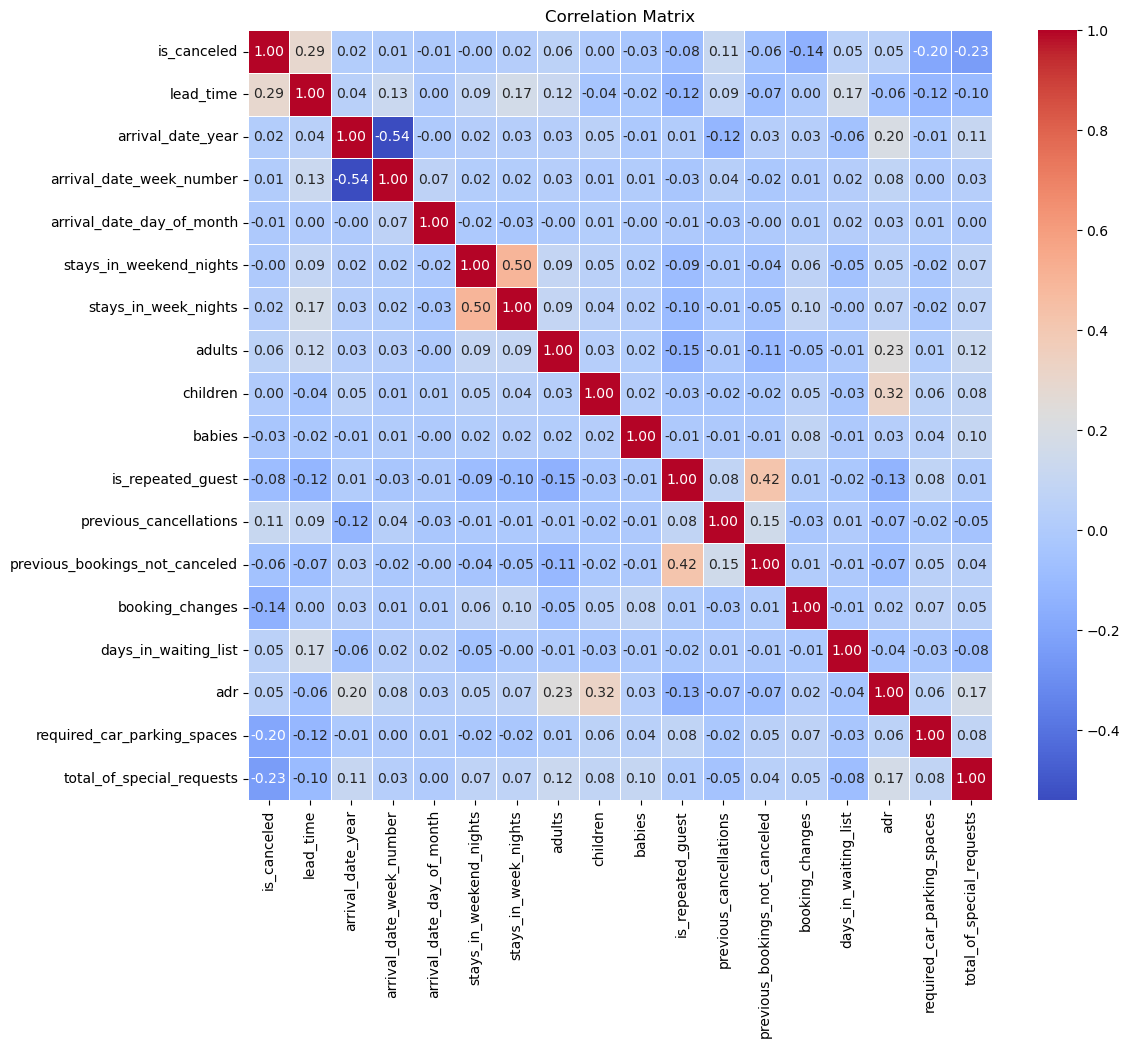

In [15]:
# Let's check the correlation between variables 
numerical_columns = data.select_dtypes(include=['int64', 'float64']).columns.tolist()
correlation_num = data[numerical_columns].corr()
print(correlation_num)

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_num, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

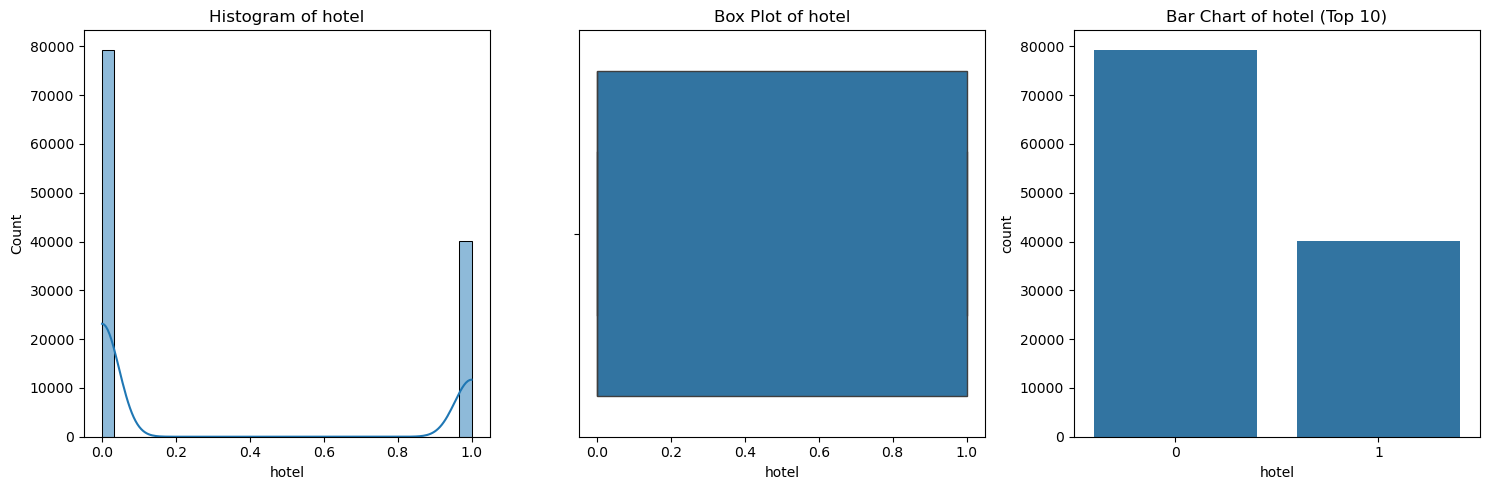

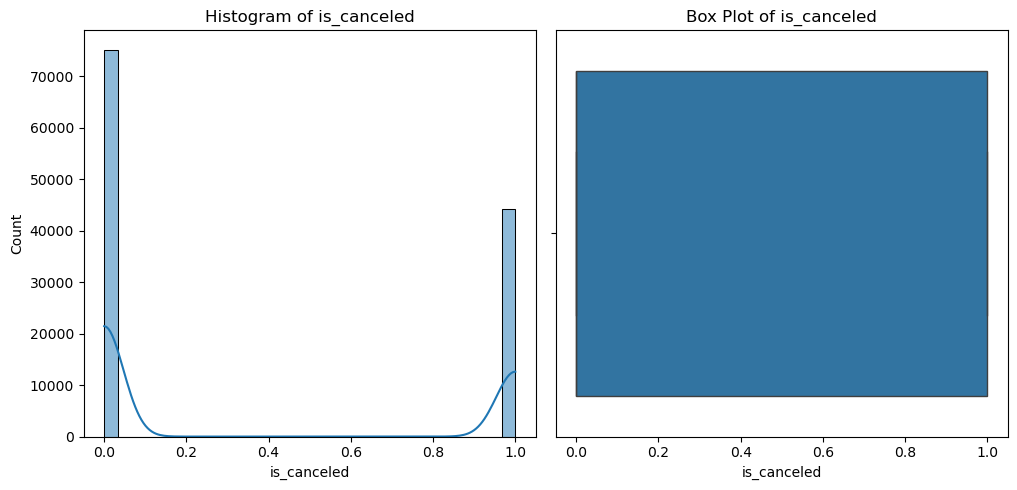

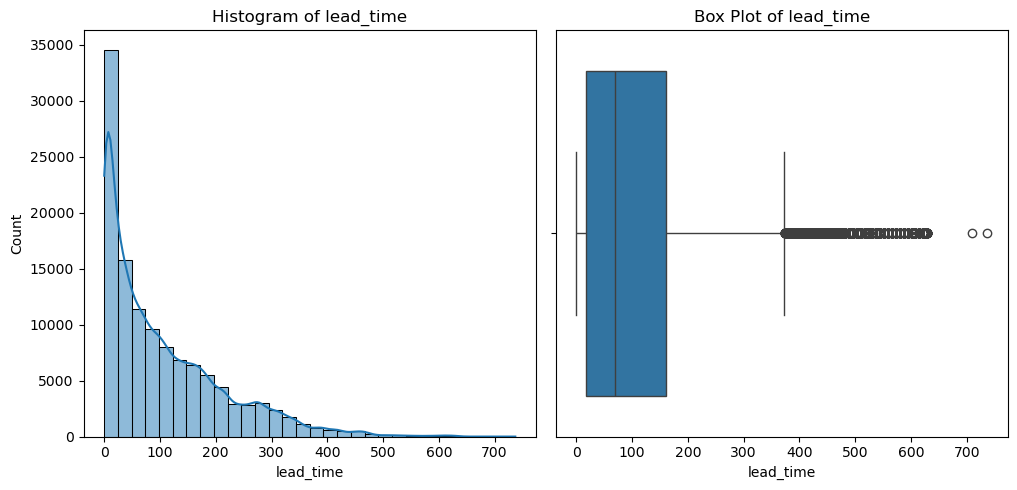

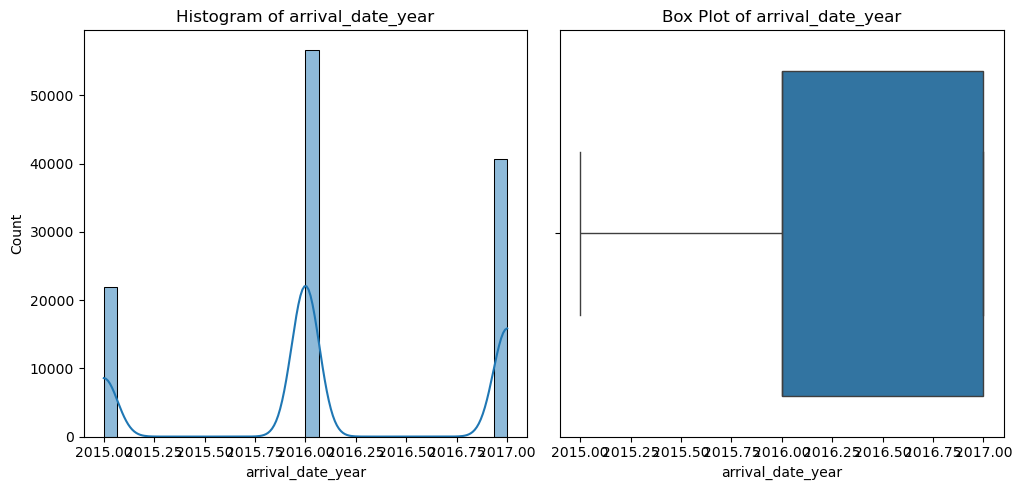

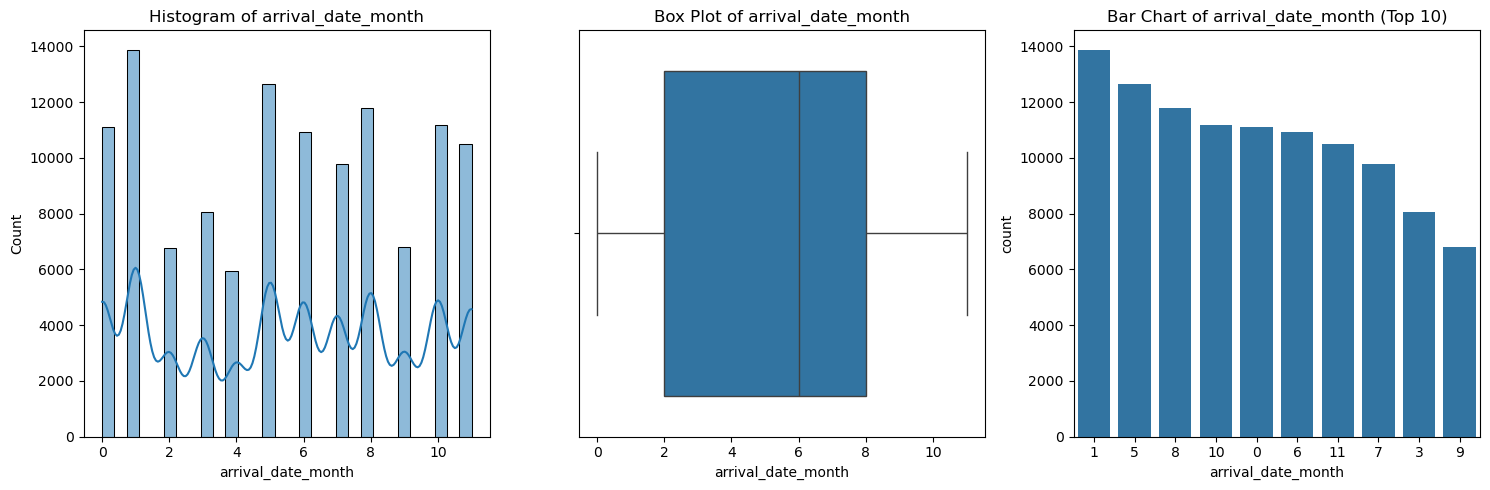

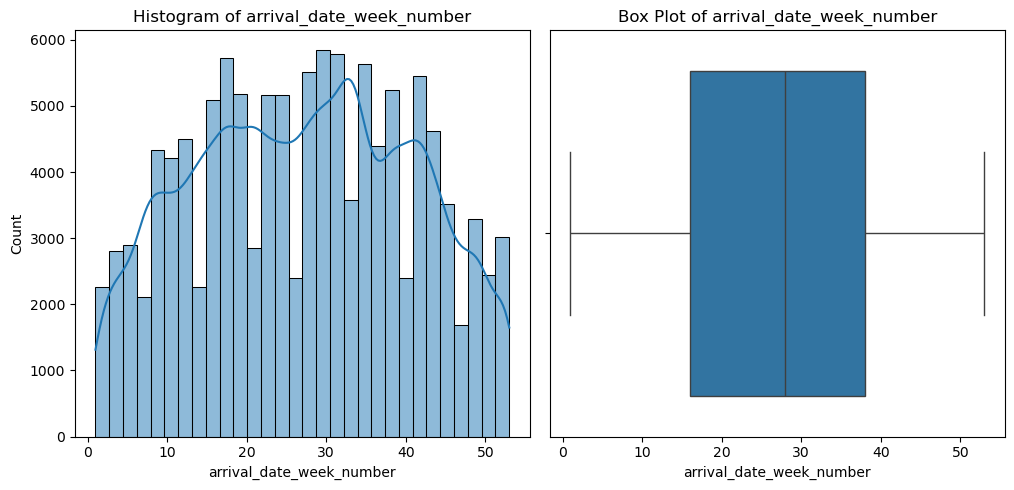

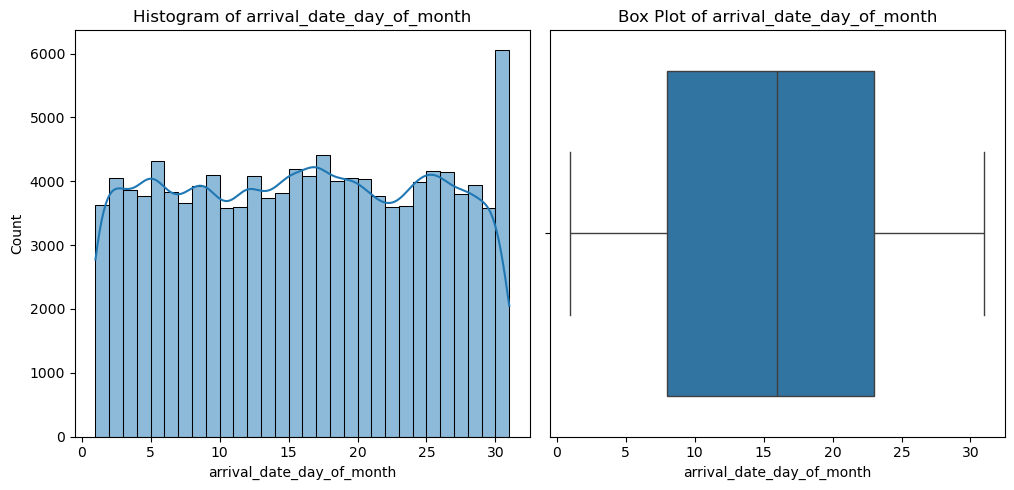

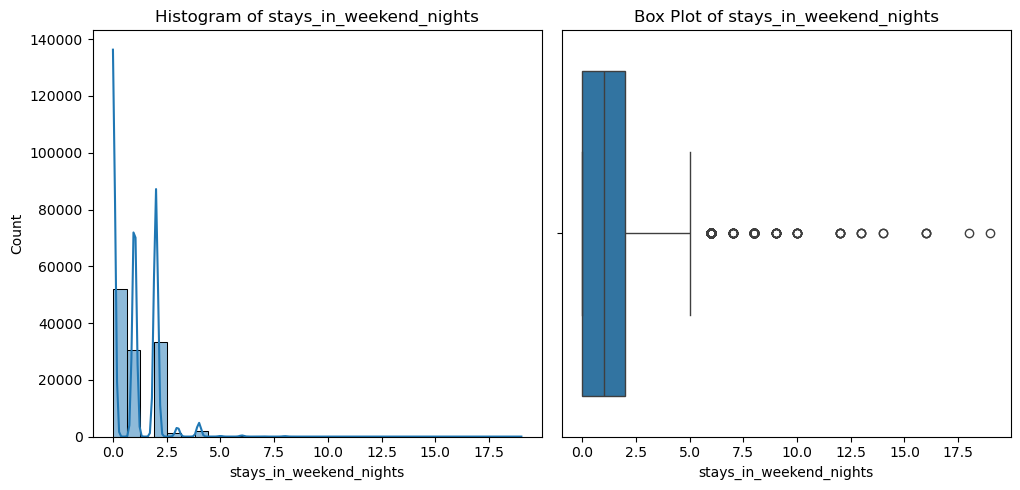

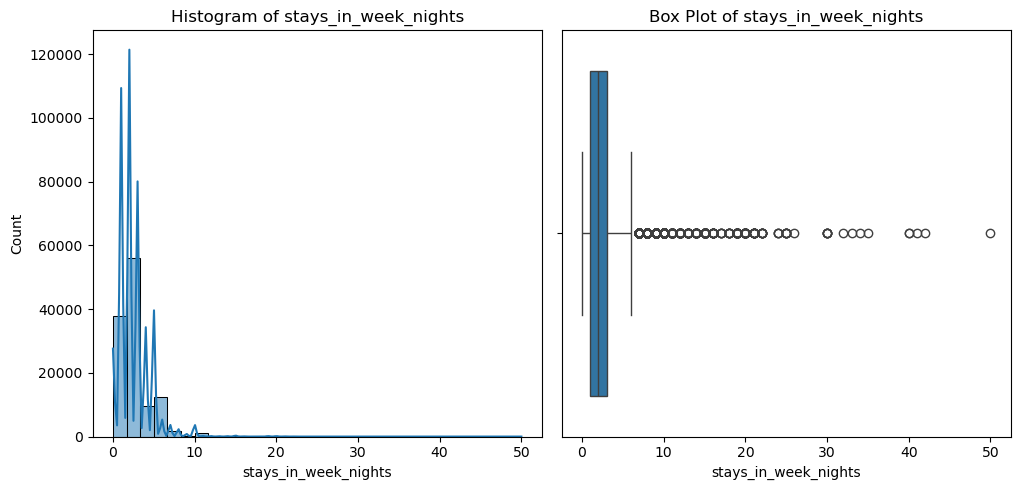

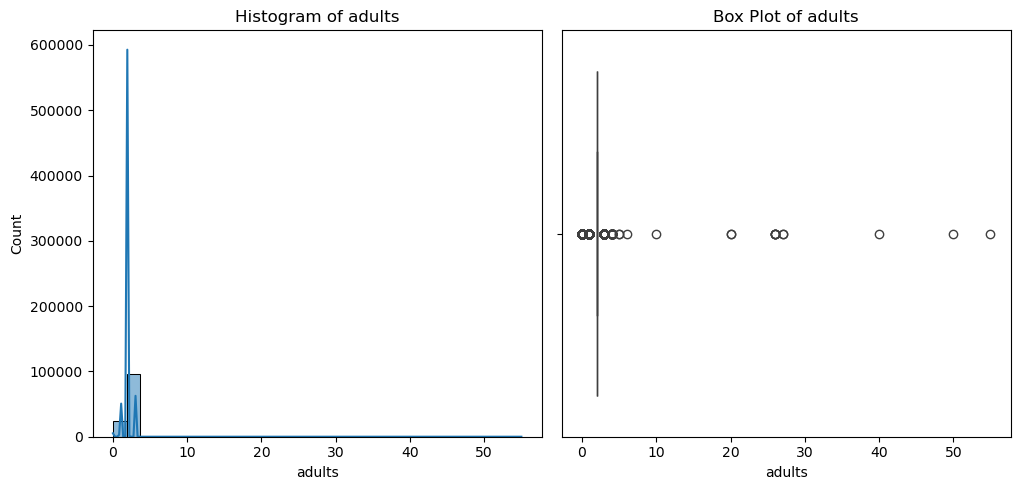

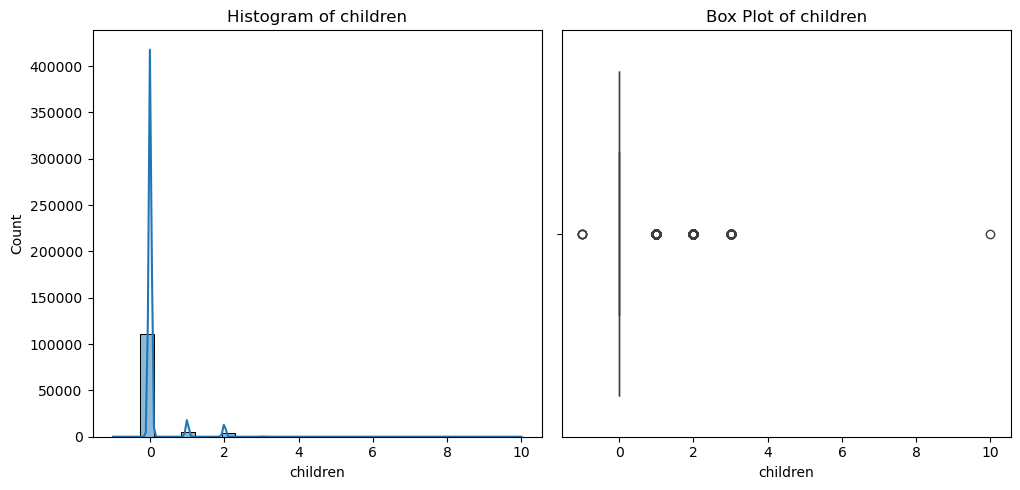

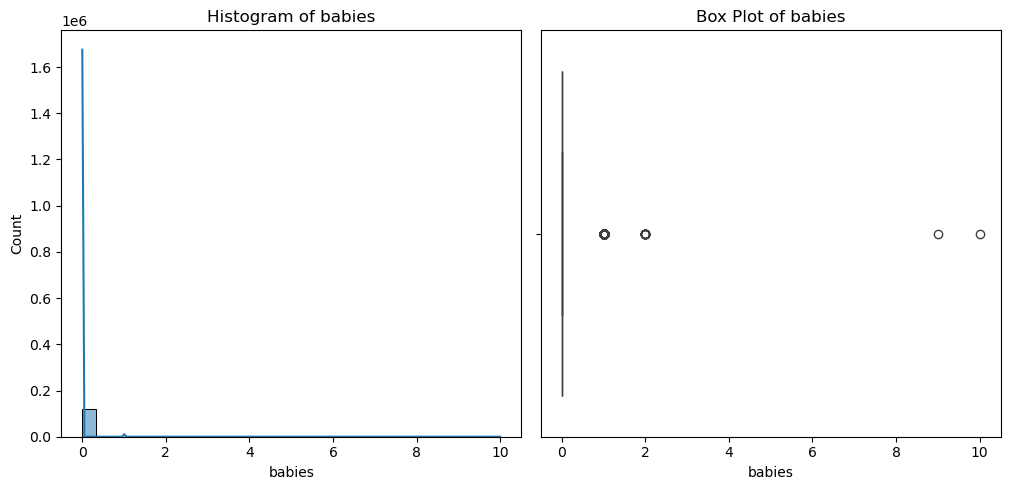

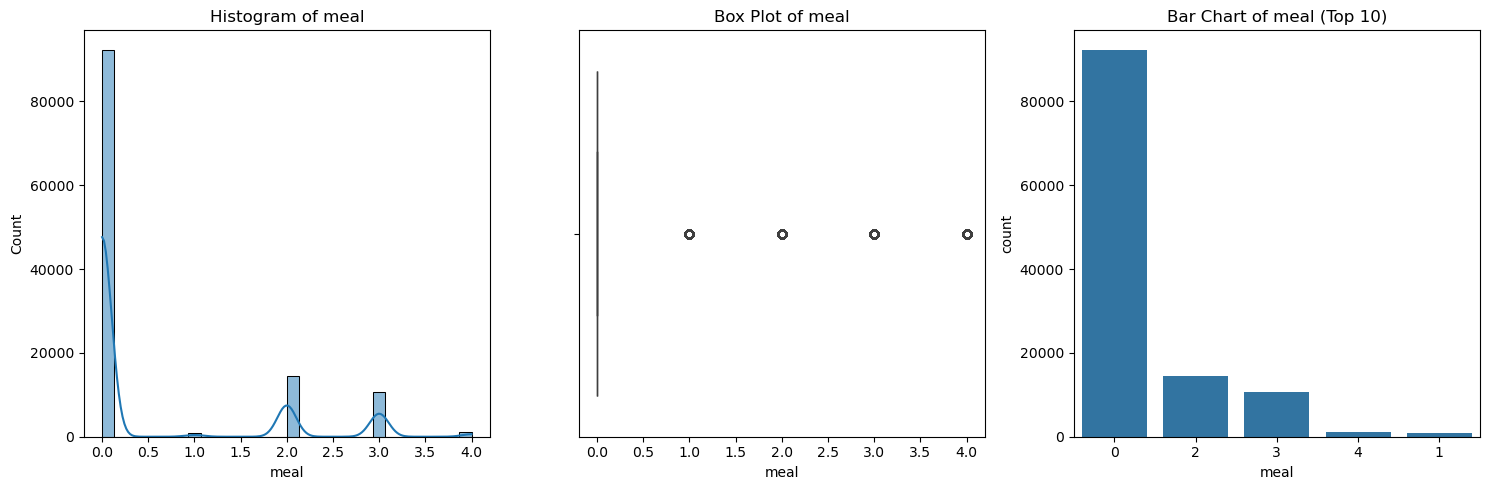

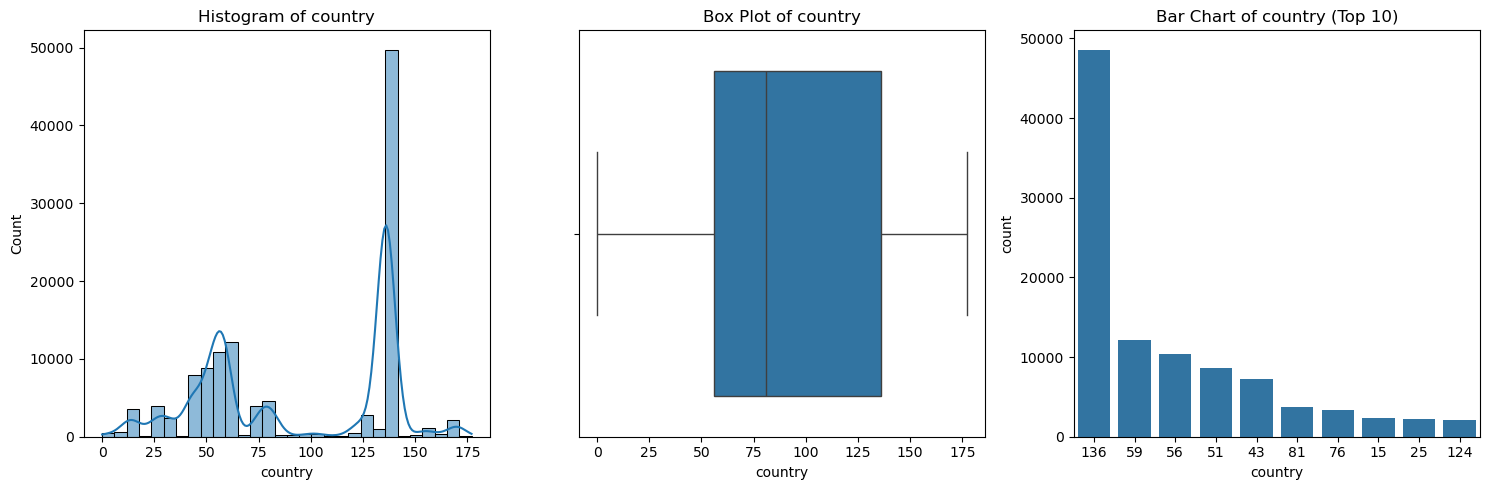

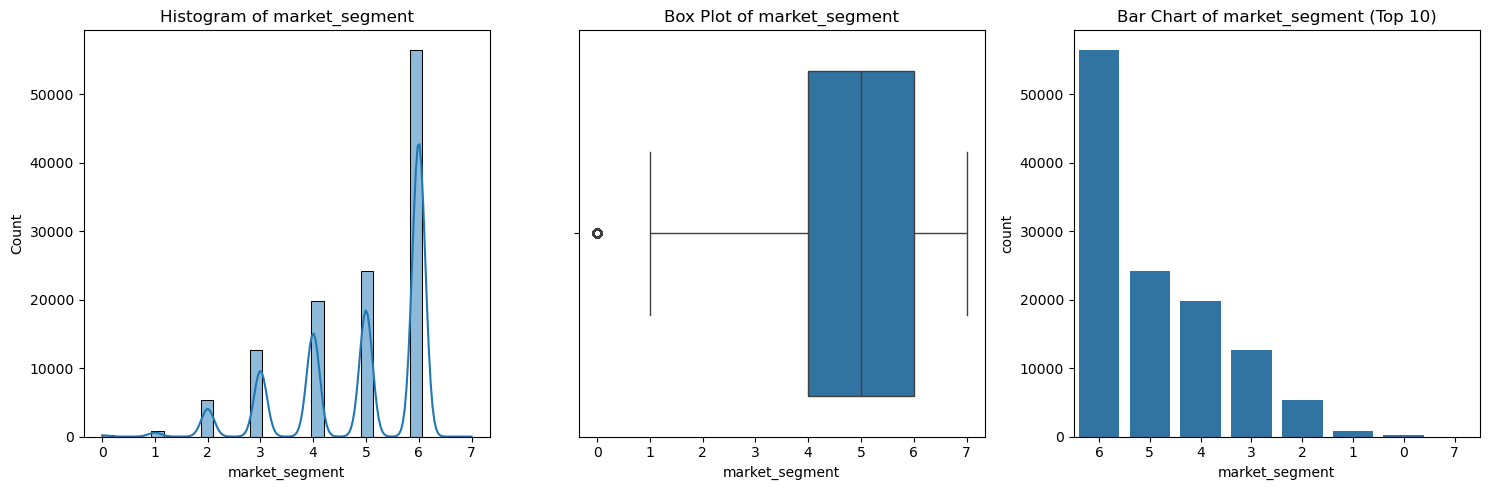

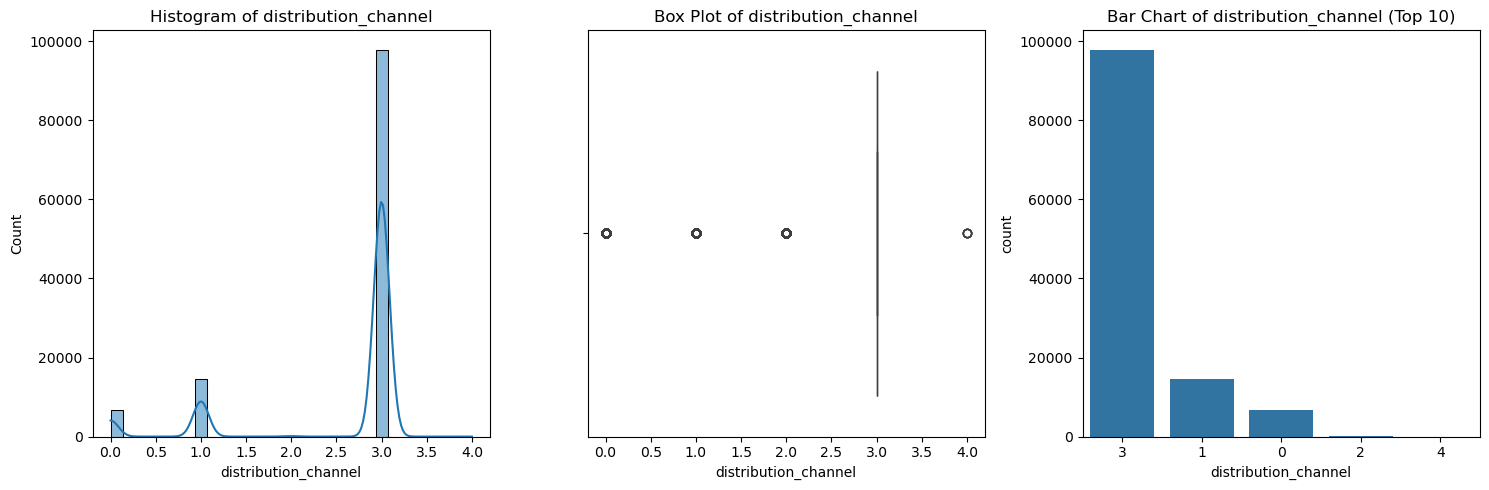

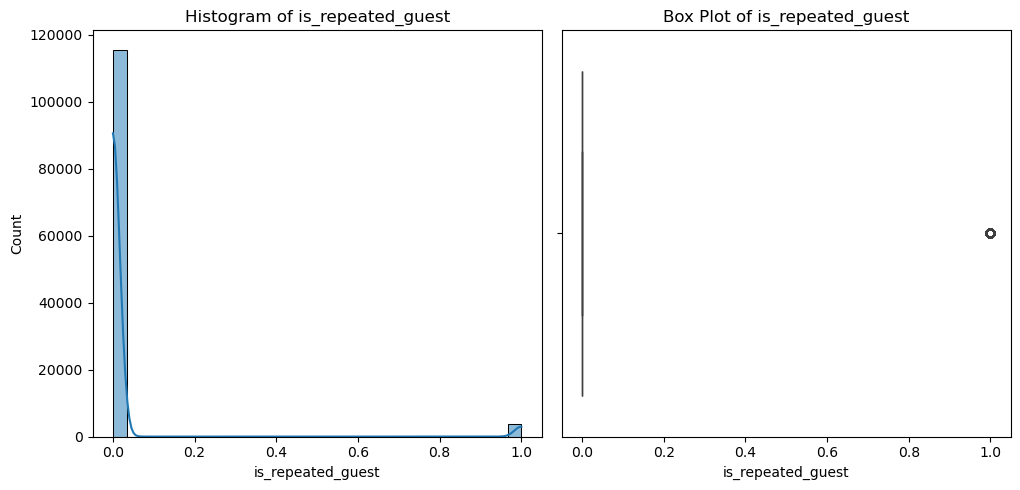

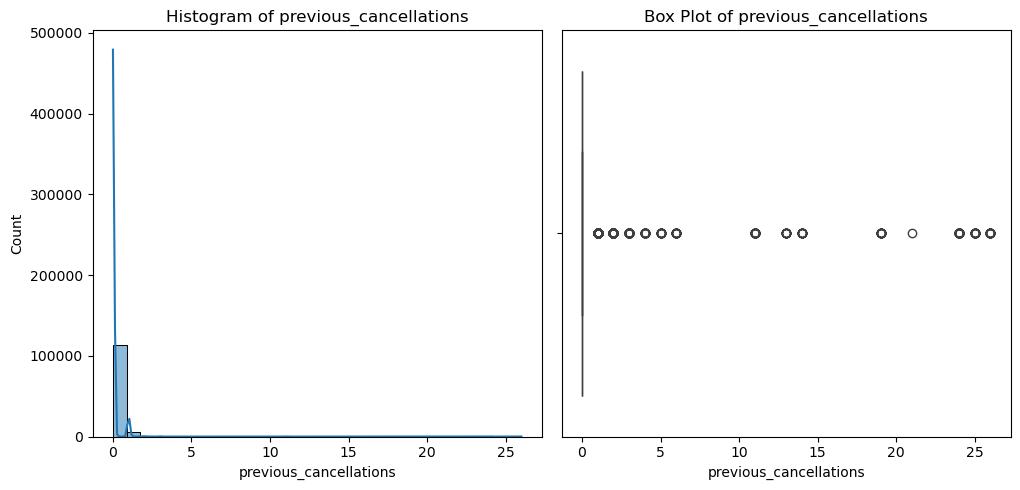

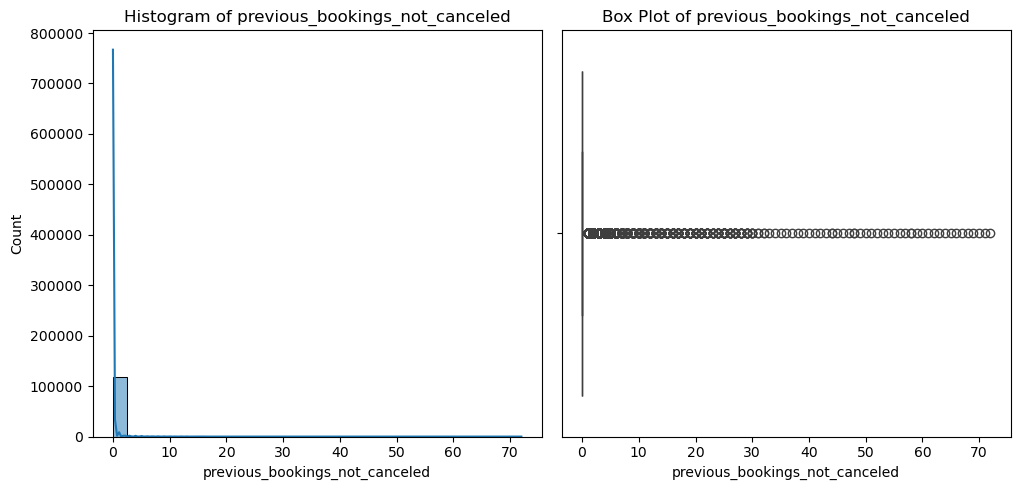

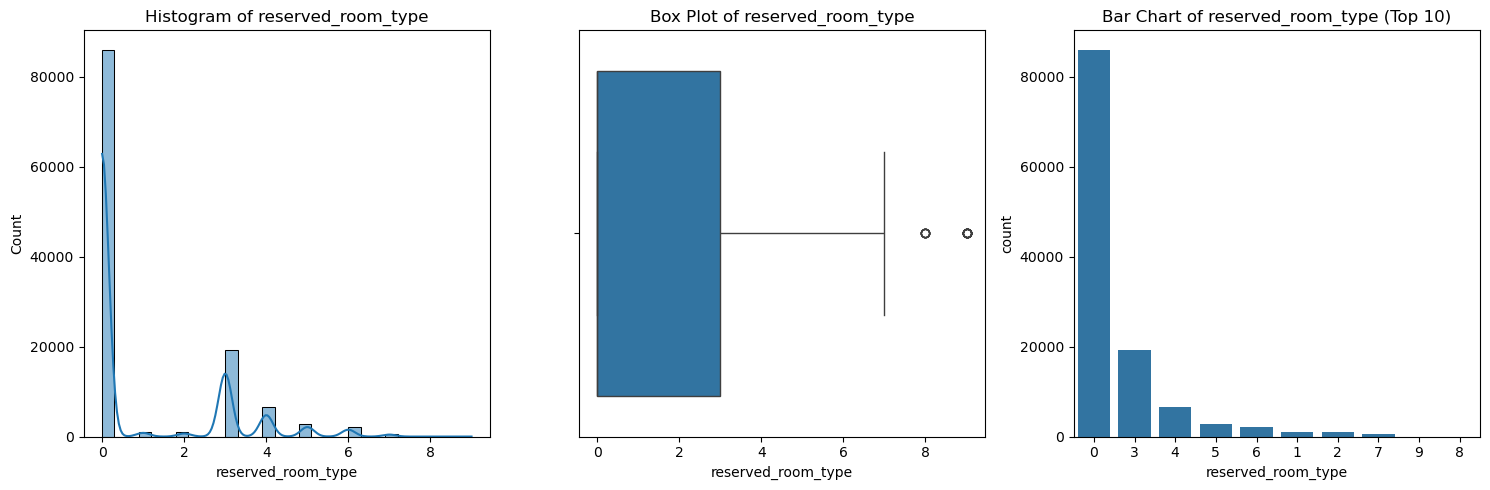

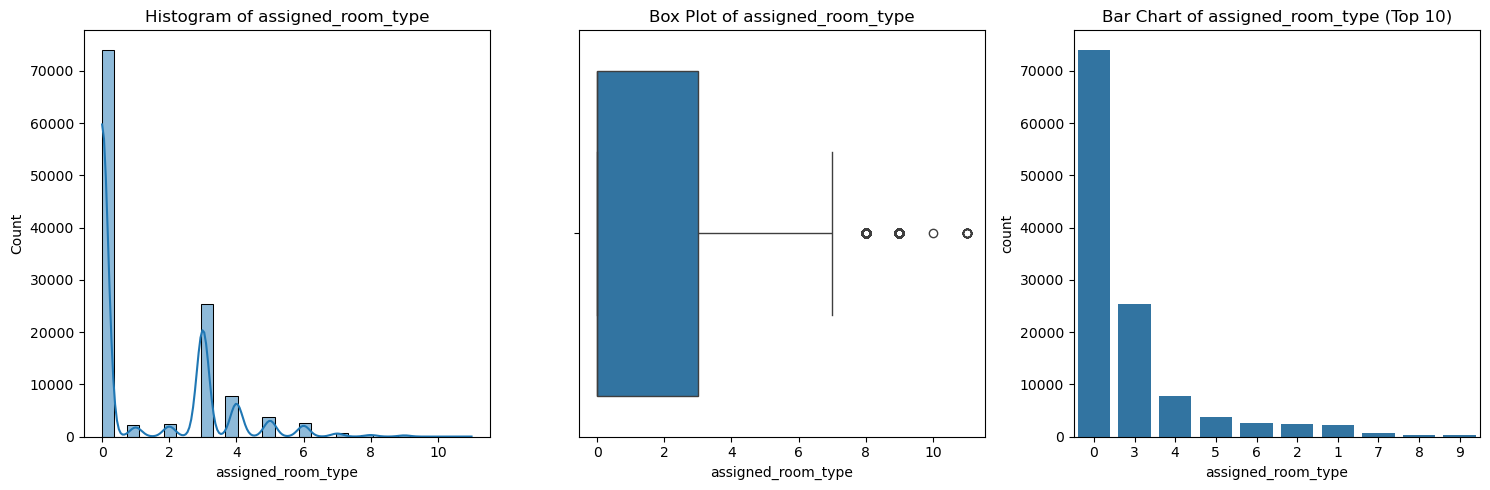

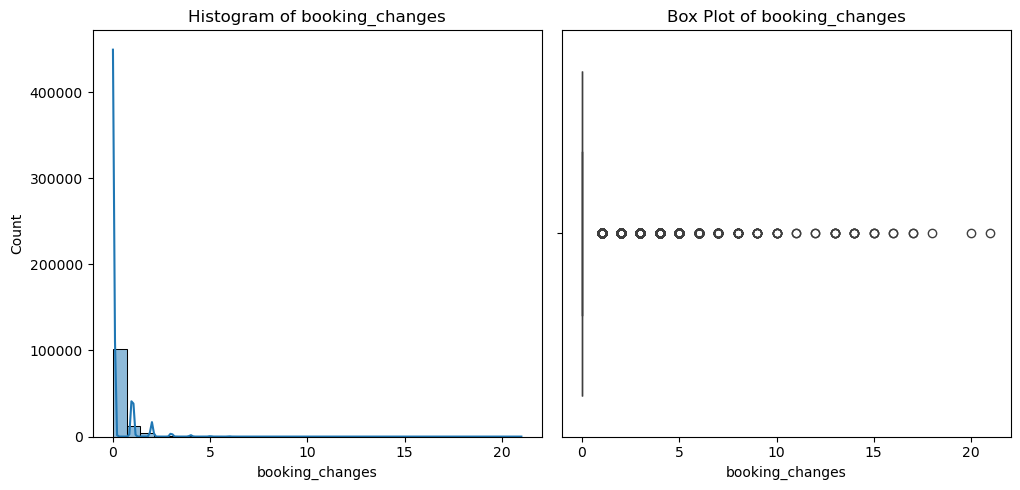

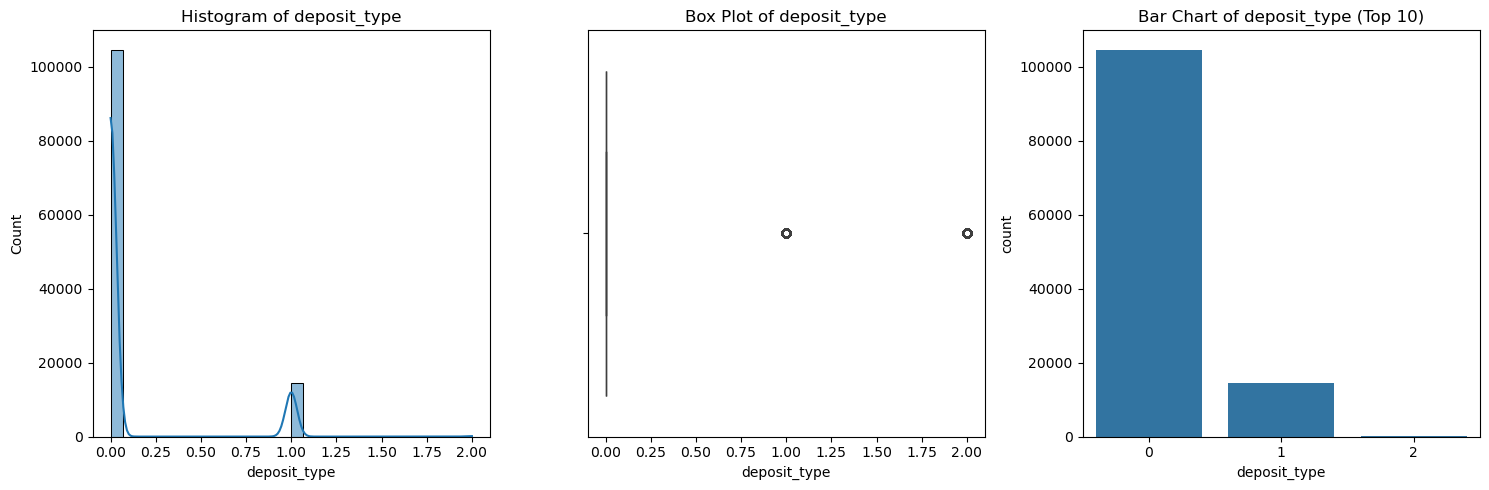

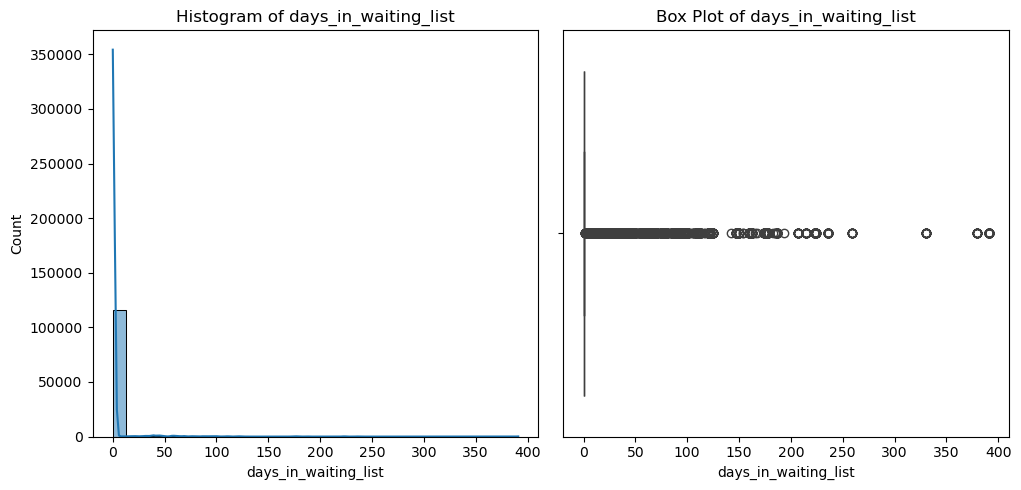

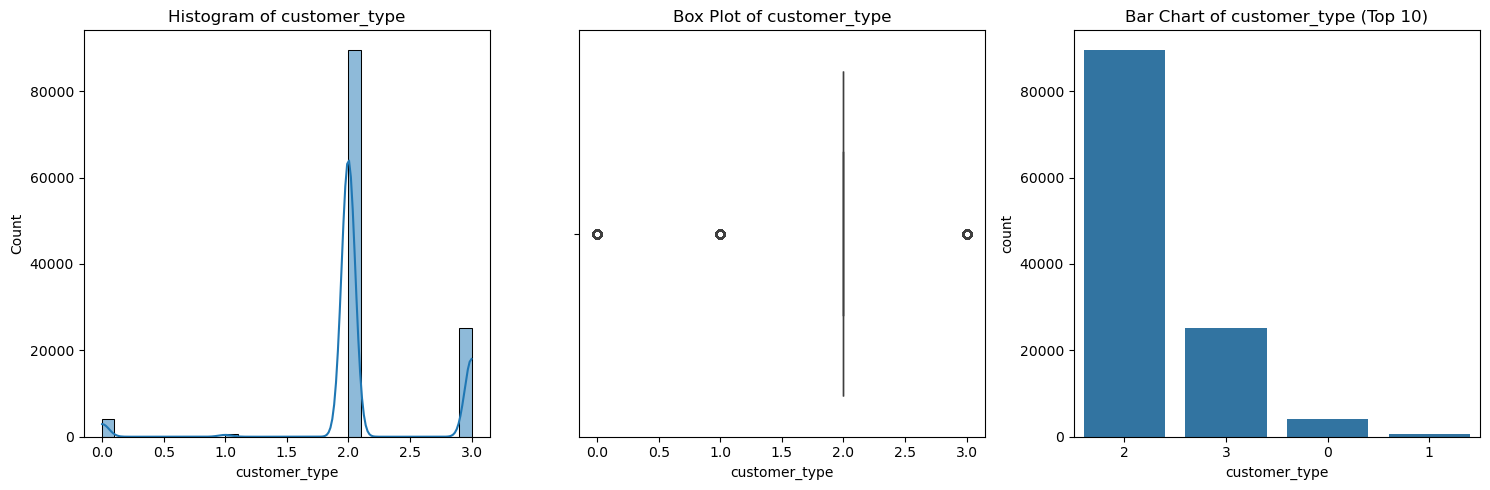

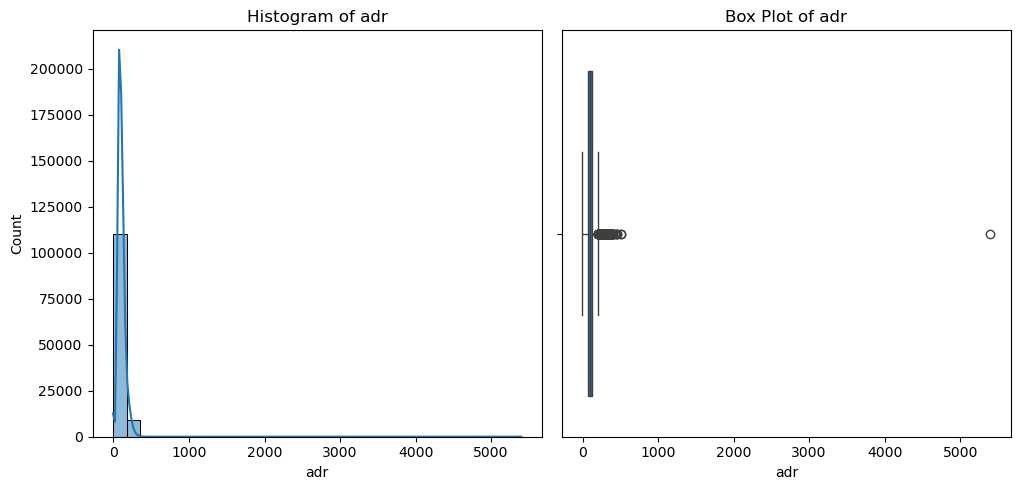

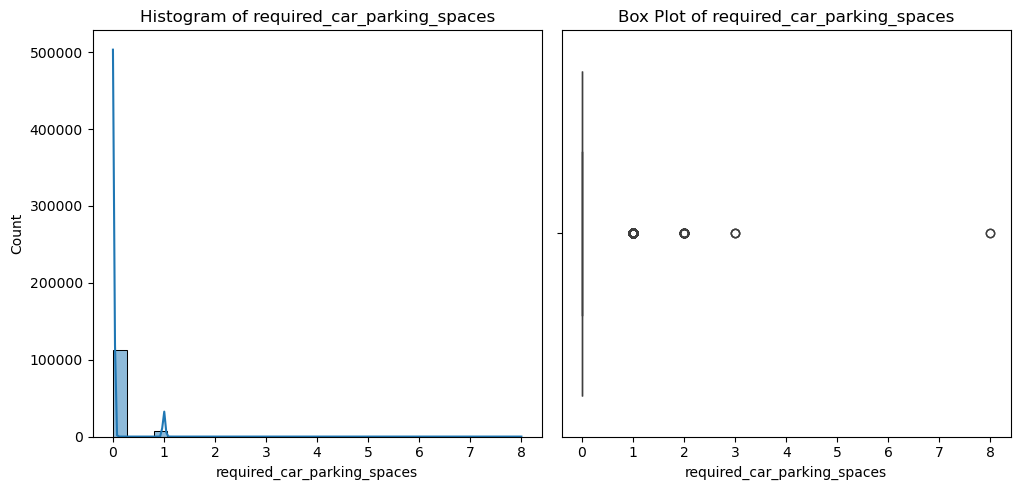

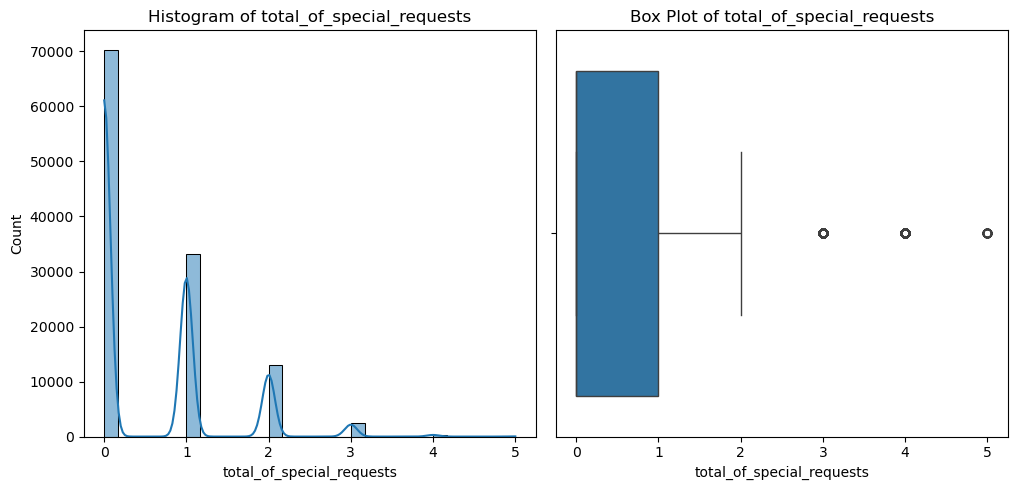

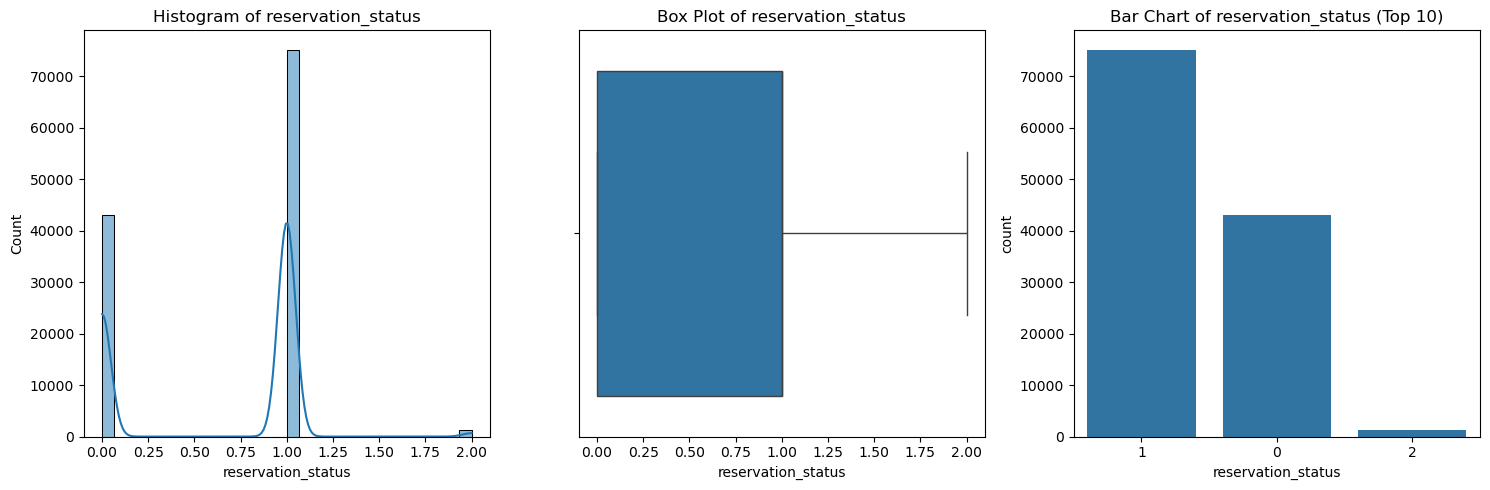

In [17]:
def univariate_analysis(data, column_name):
    describe= data[column_name].describe()
    variance_value = data[column_name].var()
    iqr_value = data[column_name].quantile(0.75) - data[column_name].quantile(0.25)
    skewness_value = data[column_name].skew()
    kurtosis_value = data[column_name].kurtosis()

    frequency_distribution = data[column_name].value_counts().head(10)

     # Visualization
    plt.figure(figsize=(15, 5))

    # Histogram
    plt.subplot(1, 3, 1)
    sns.histplot(data[column_name], kde=True, bins=30)
    plt.title(f'Histogram of {column_name}')

    # Box Plot
    plt.subplot(1, 3, 2)
    sns.boxplot(x=data[column_name])
    plt.title(f'Box Plot of {column_name}')

   
    # Bar Chart (for categorical features)
    if data[column_name].dtype == 'int' or data[column_name].dtype == 'object':
        plt.subplot(1, 3, 3)
        sns.countplot(x=data[column_name], order=data[column_name].value_counts().index[:10])
        plt.title(f'Bar Chart of {column_name} (Top 10)')


    plt.tight_layout()
    plt.show()

variables_to_analyse=data.columns
for varible in variables_to_analyse:
    univariate_analysis(data, varible)


C:\Users\carlo\AppData\Local\Temp\ipykernel_30676\3713164749.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


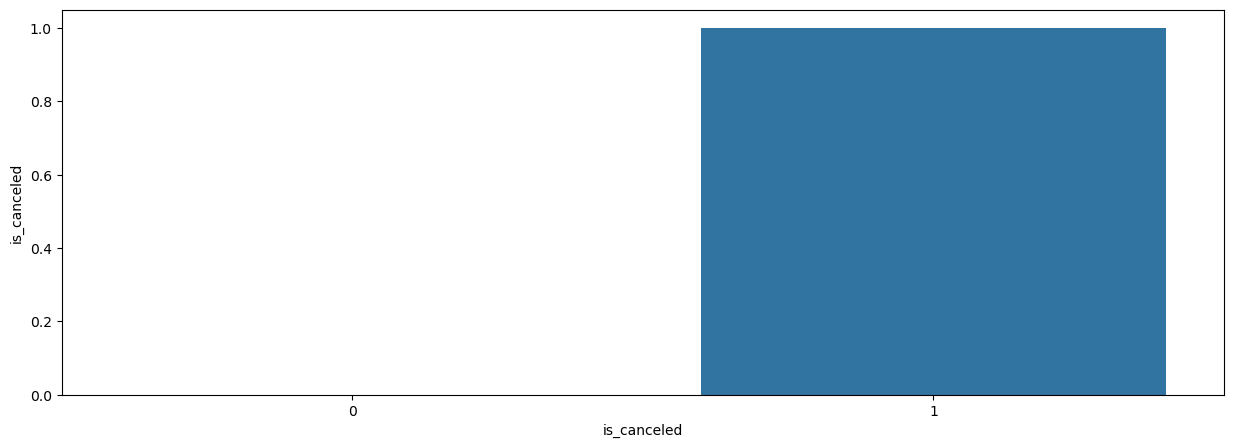

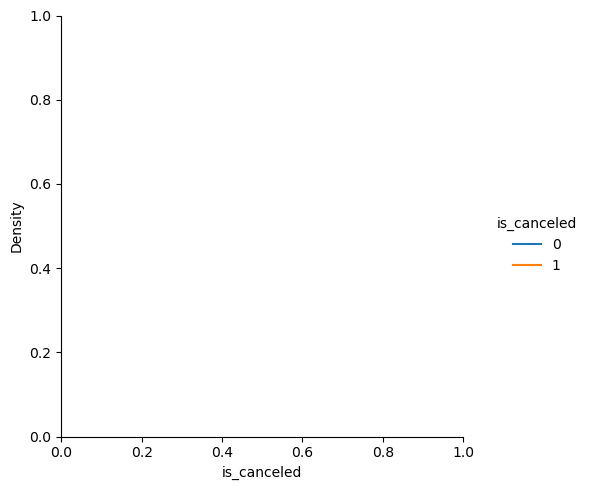

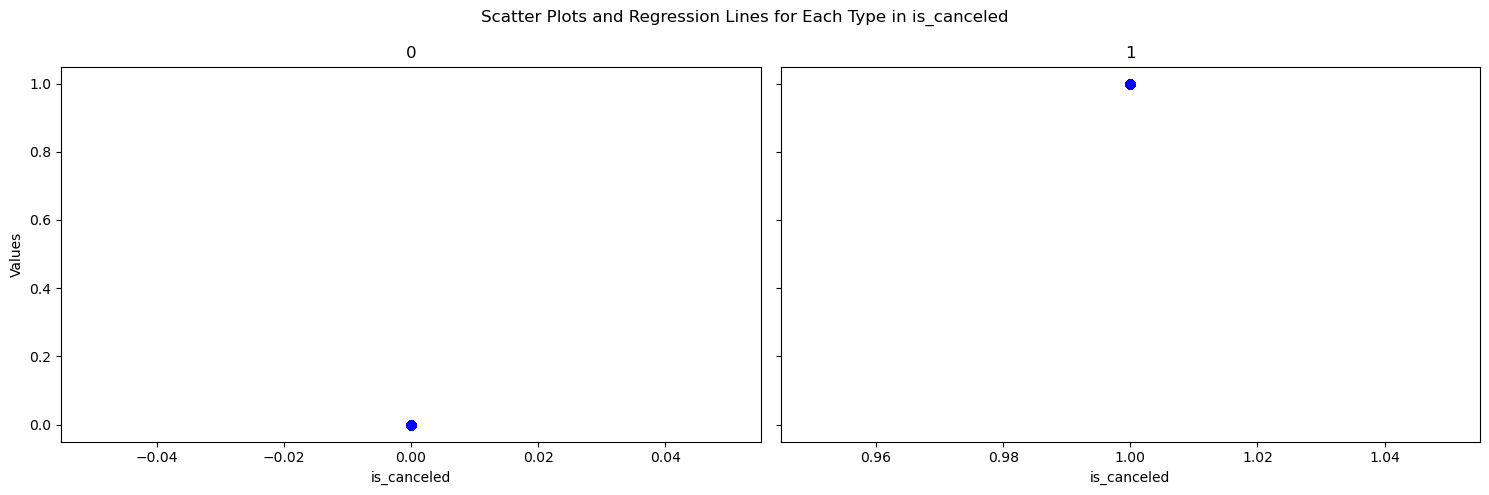

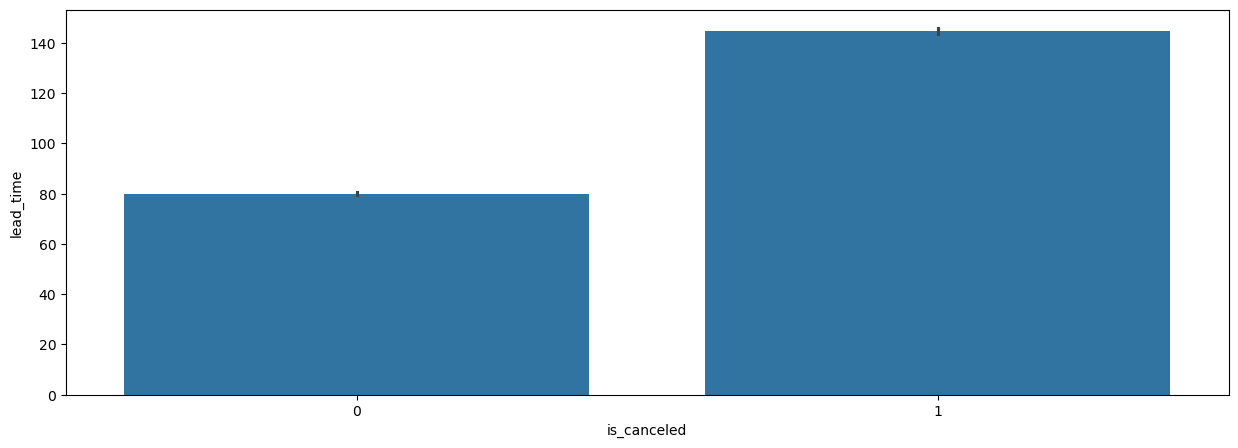

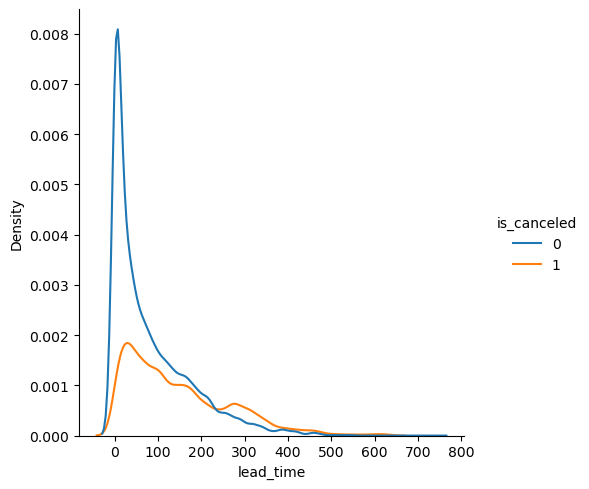

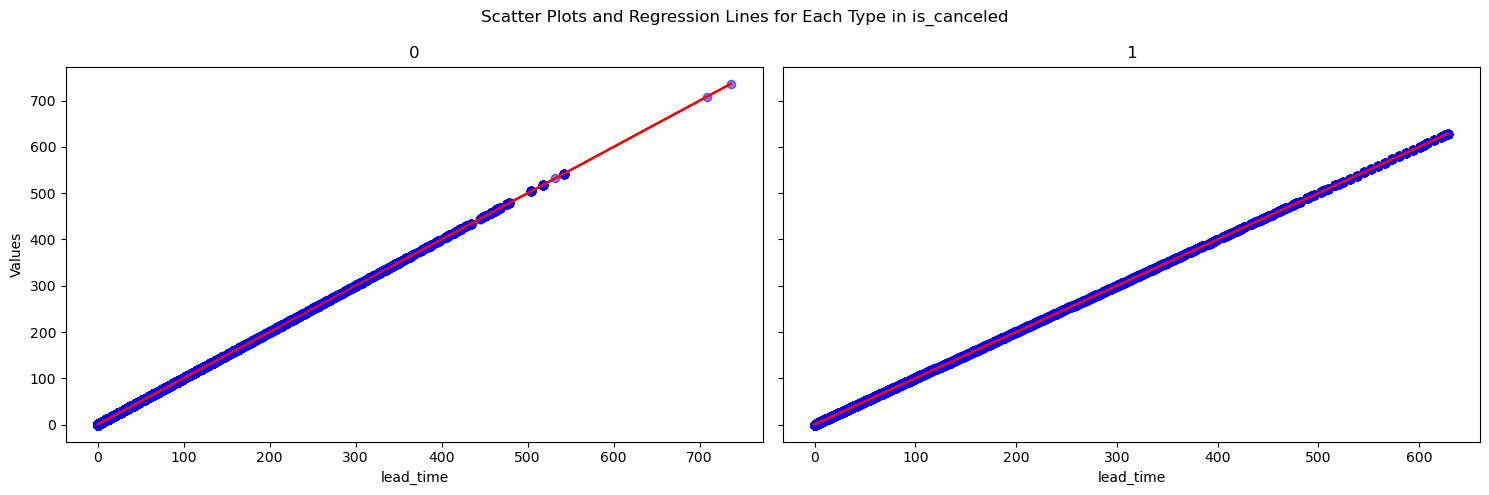

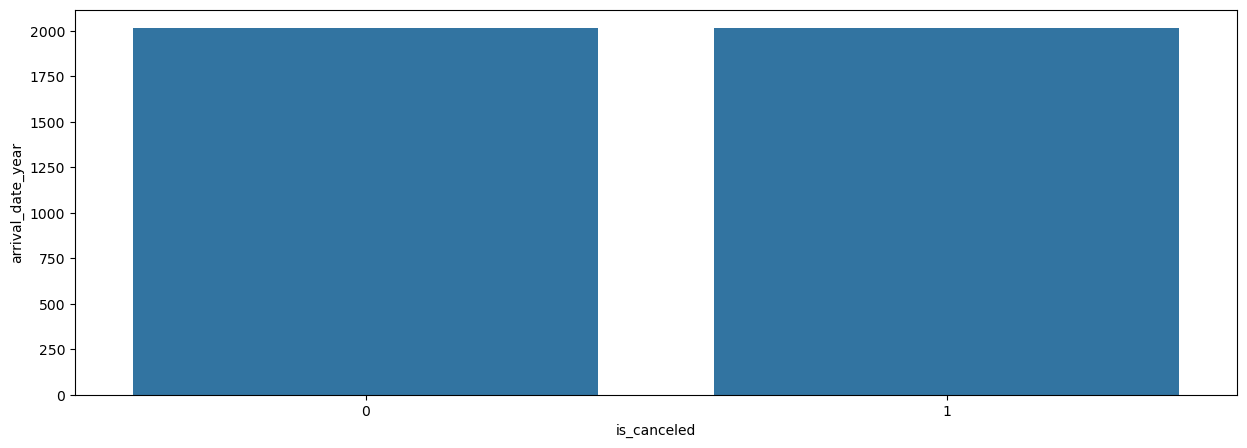

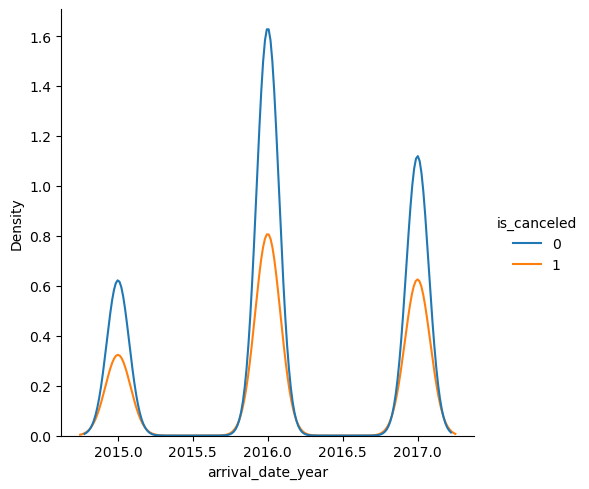

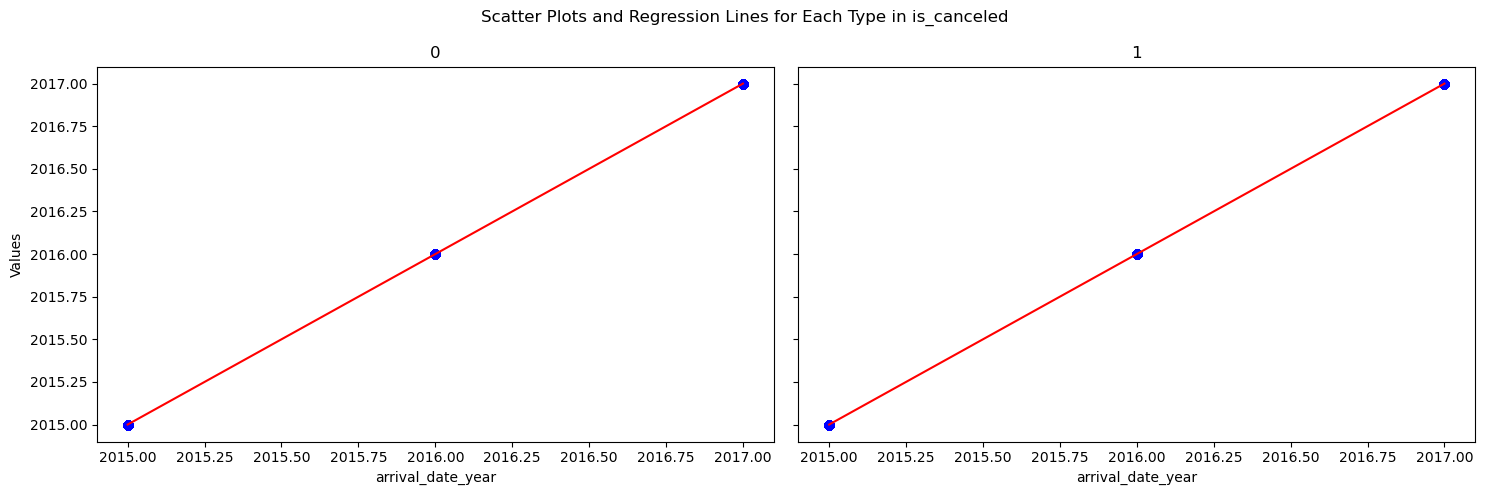

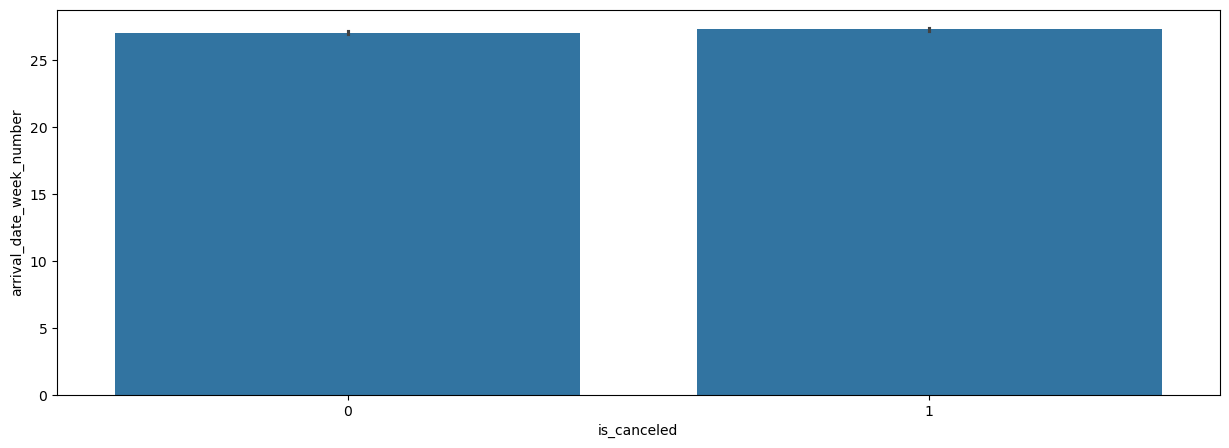

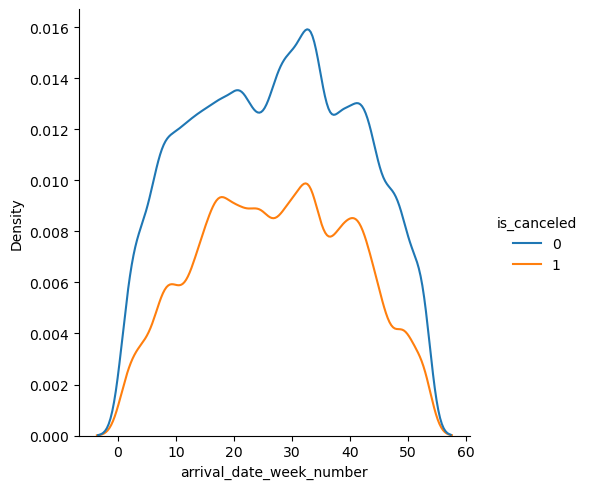

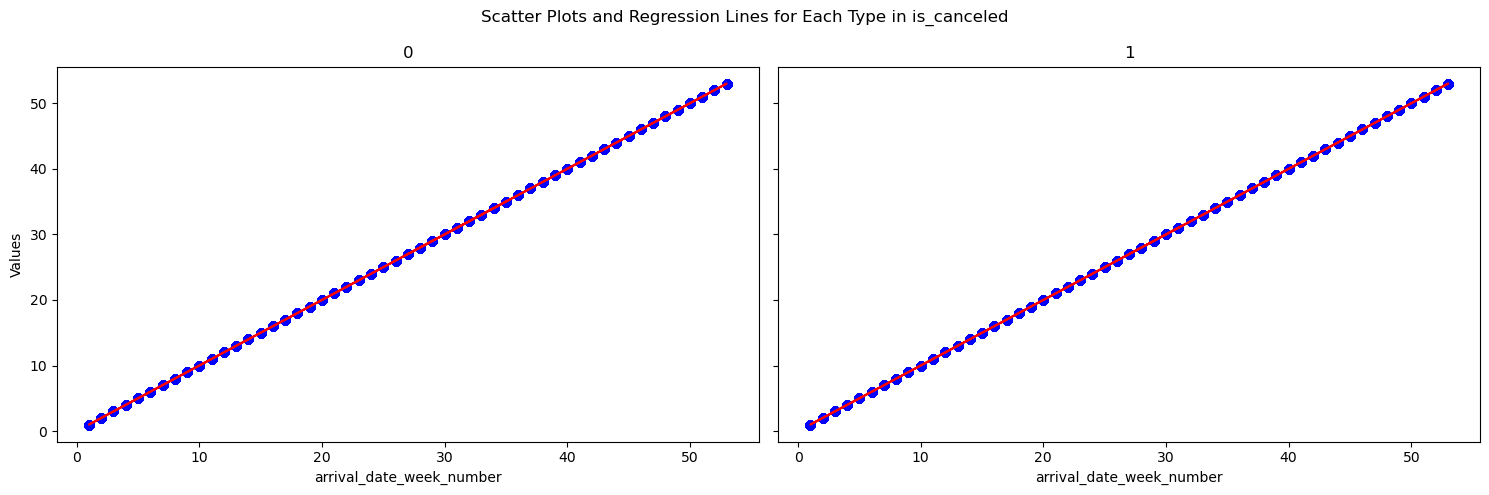

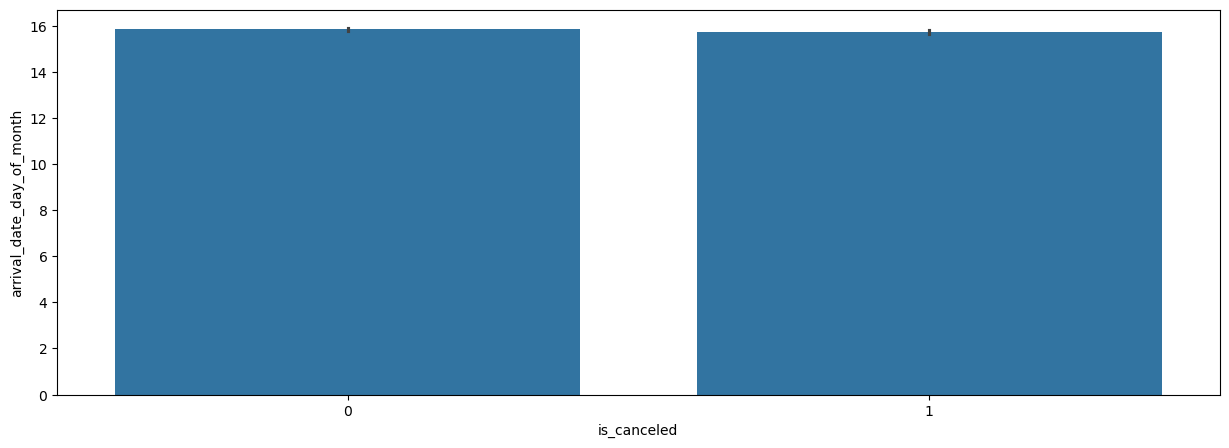

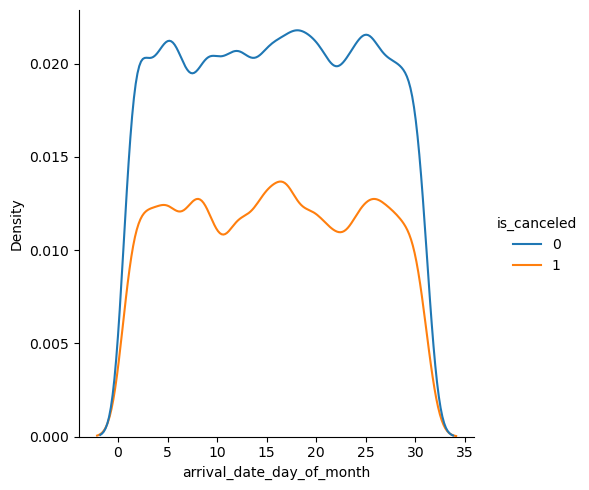

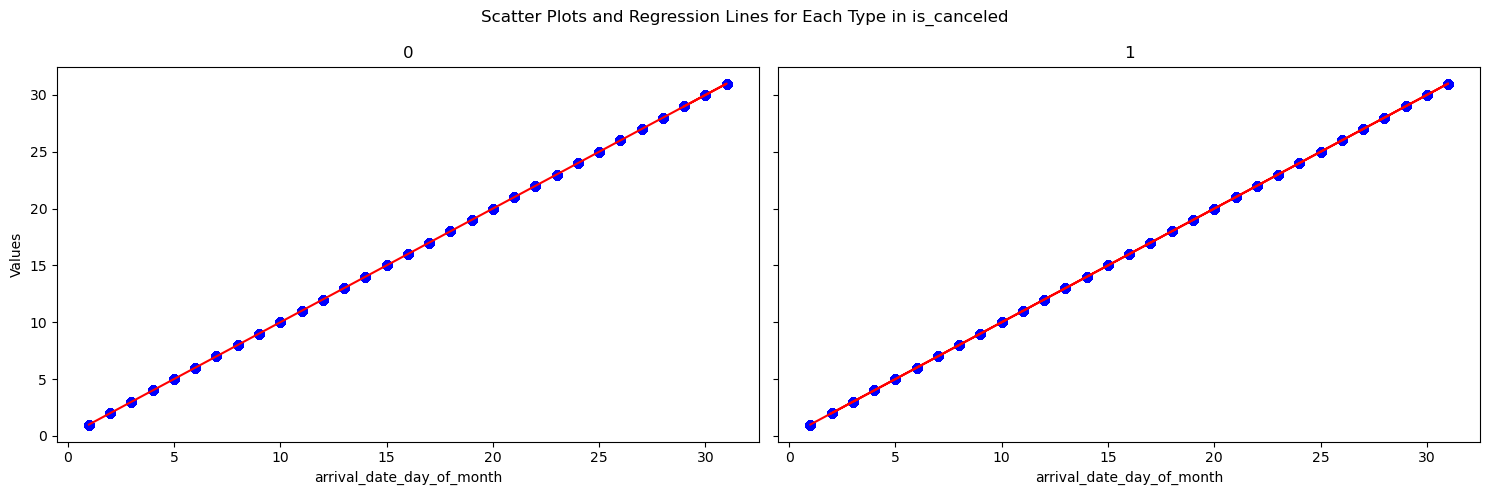

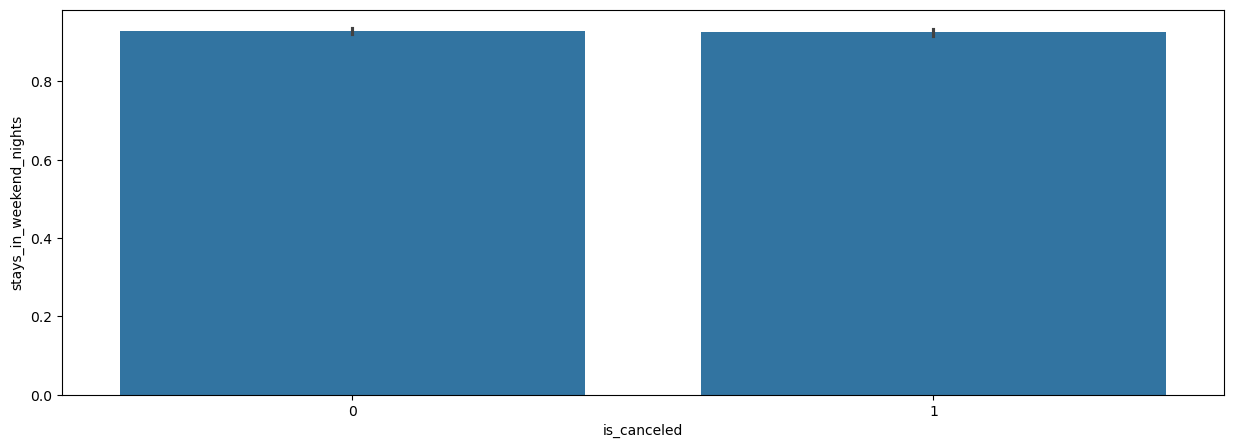

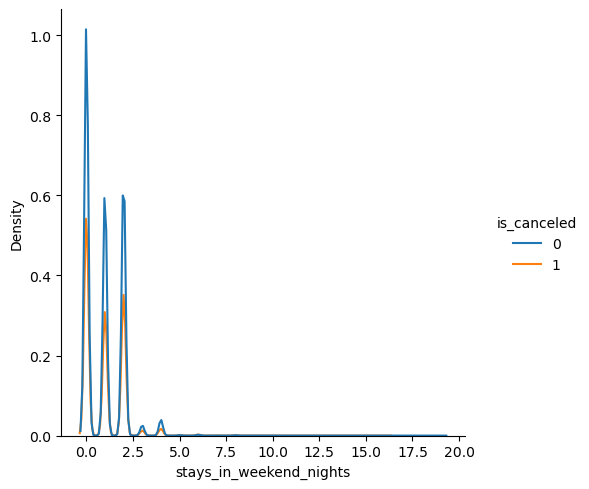

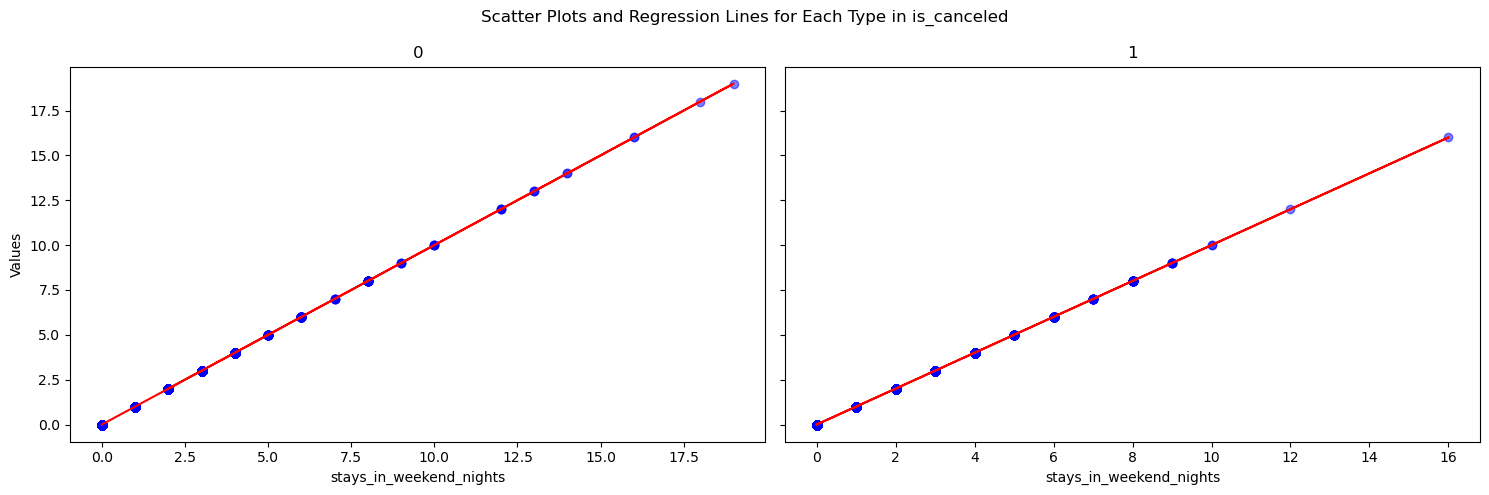

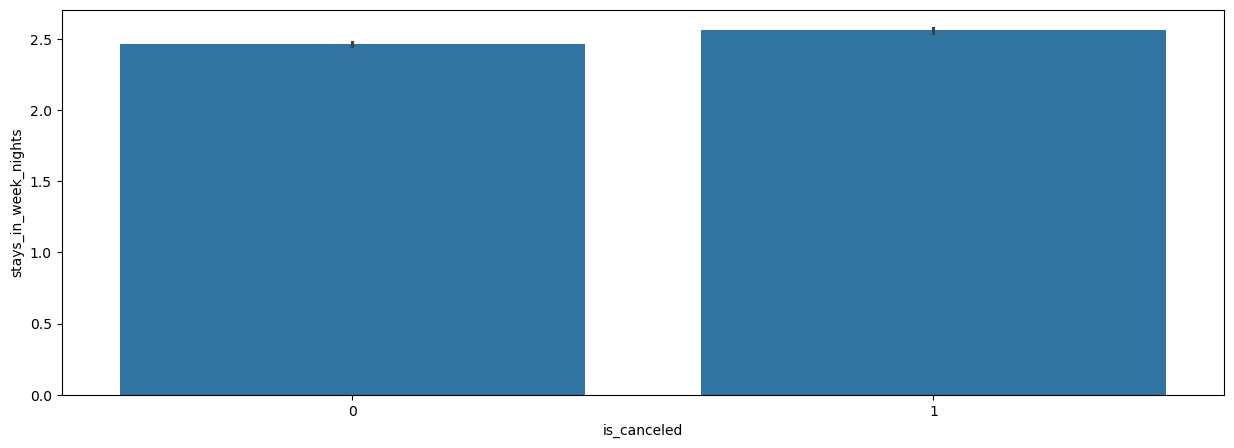

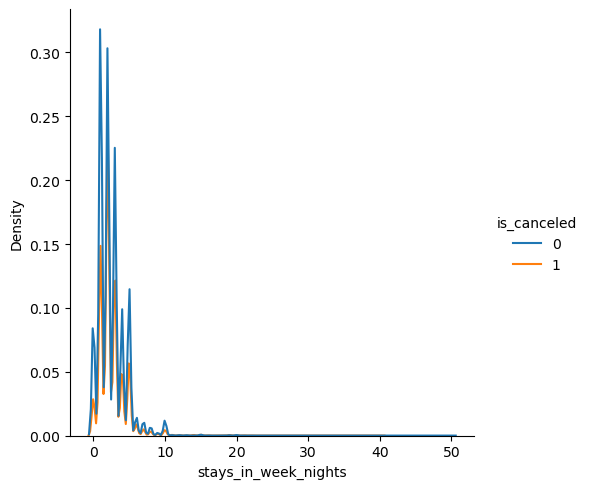

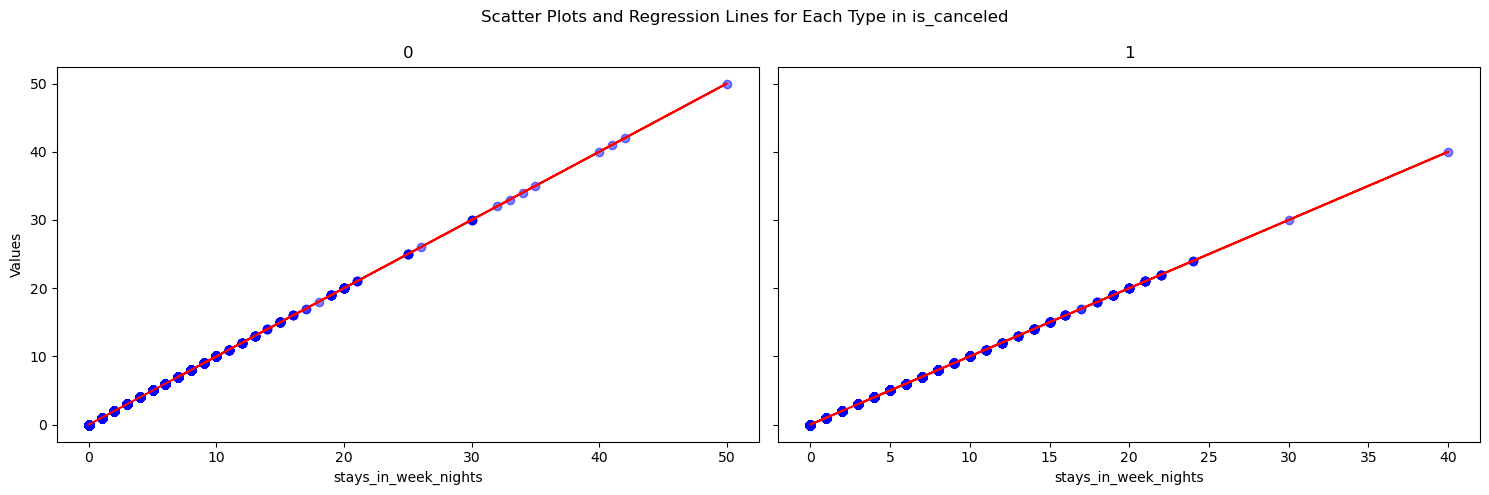

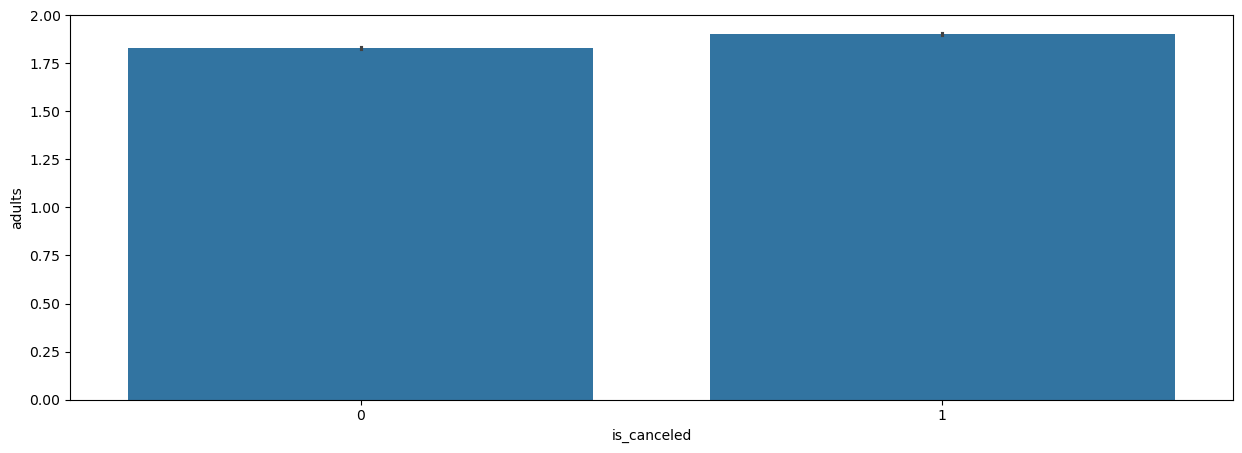

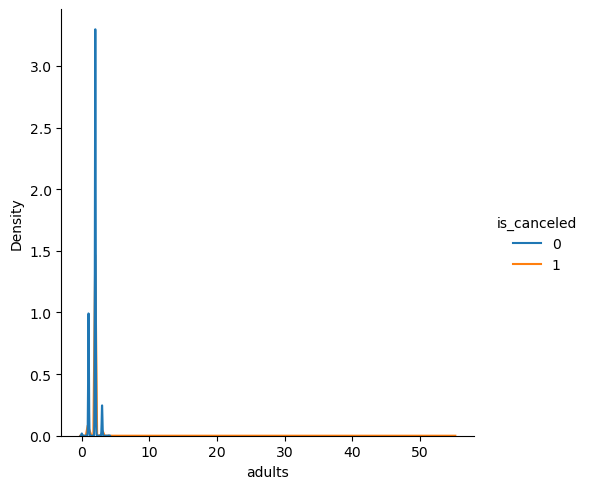

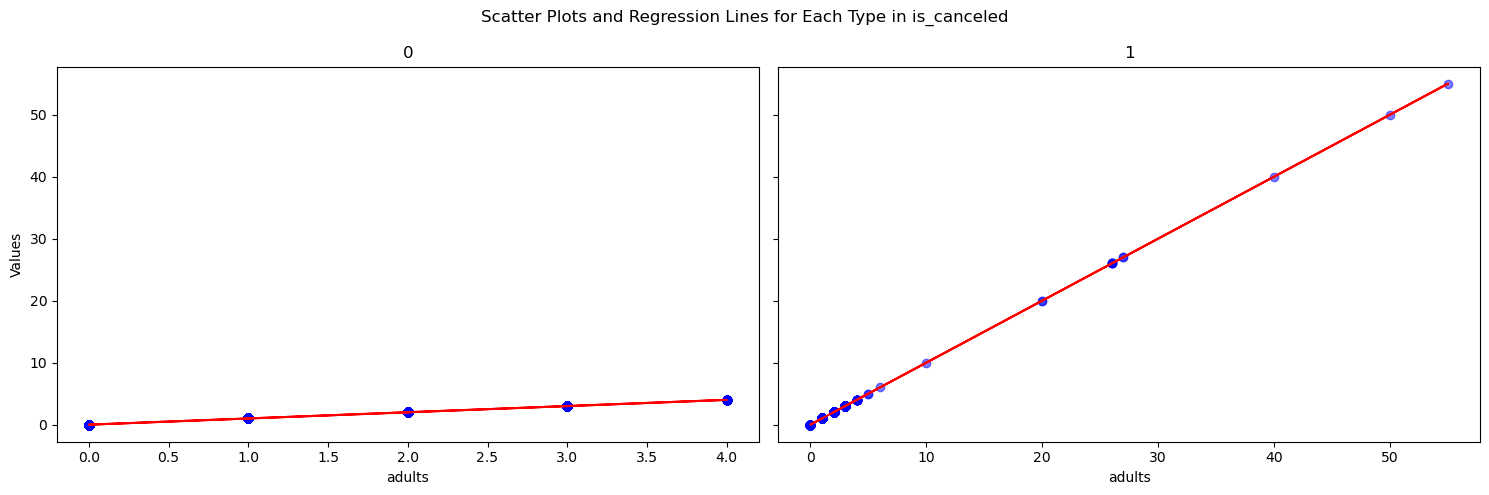

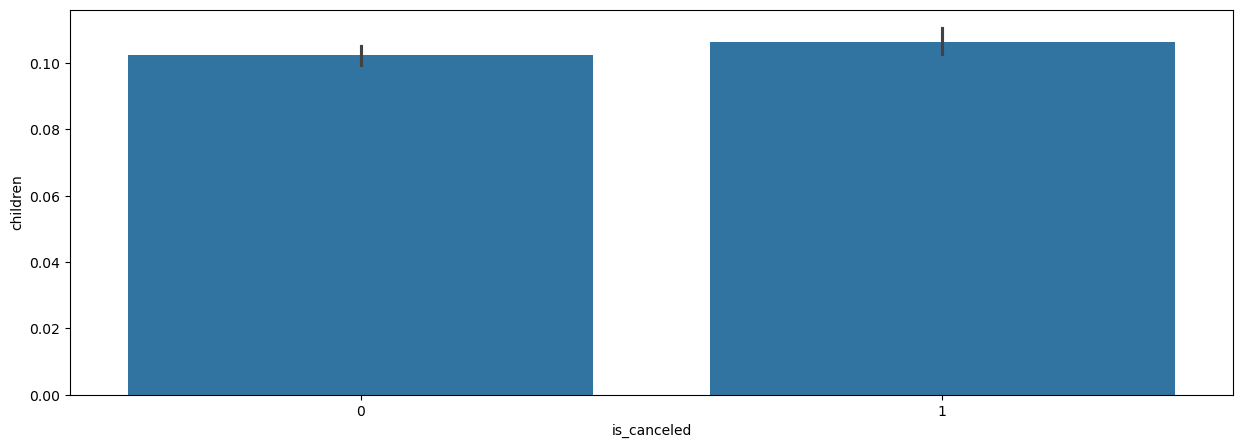

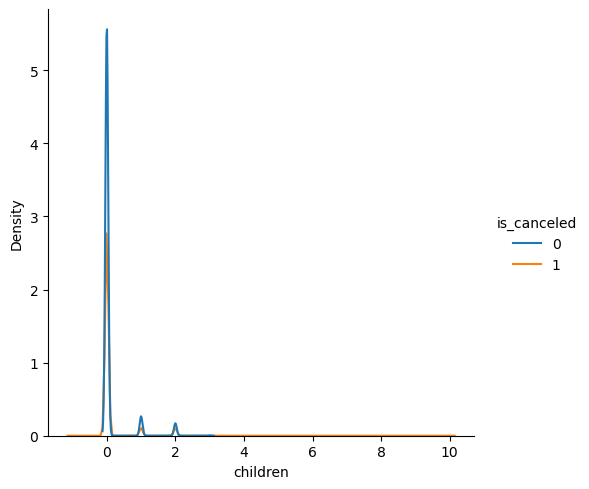

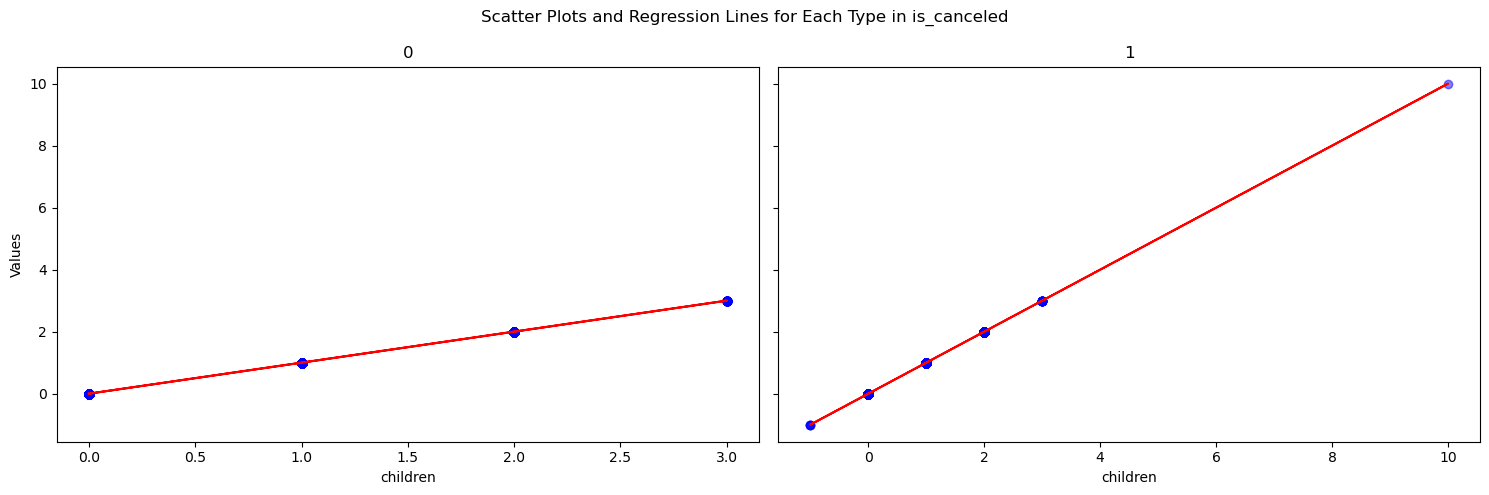

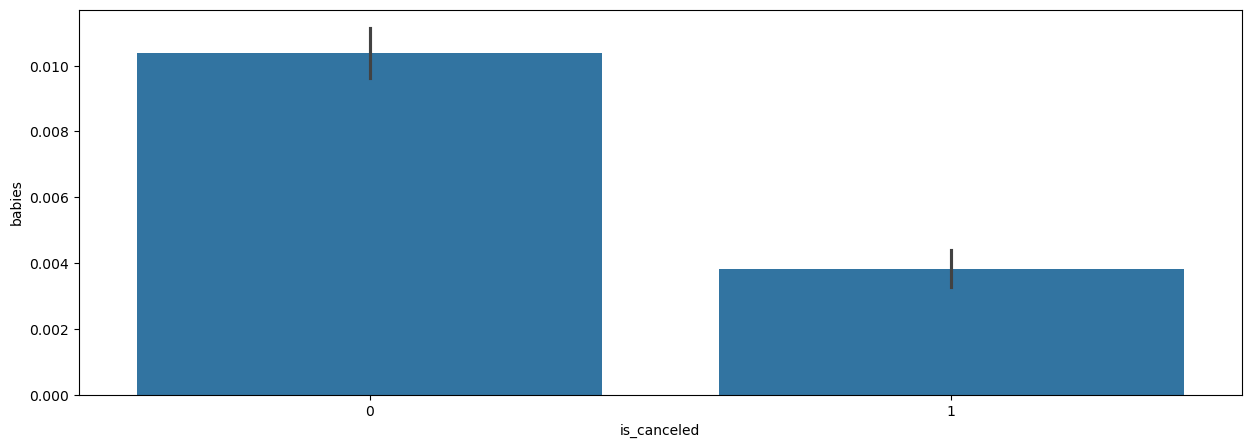

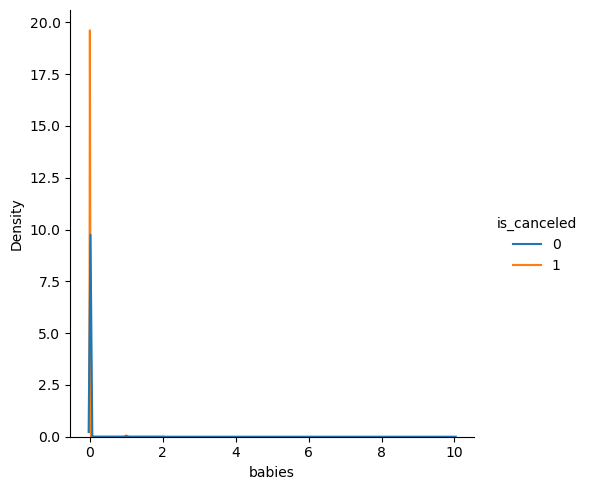

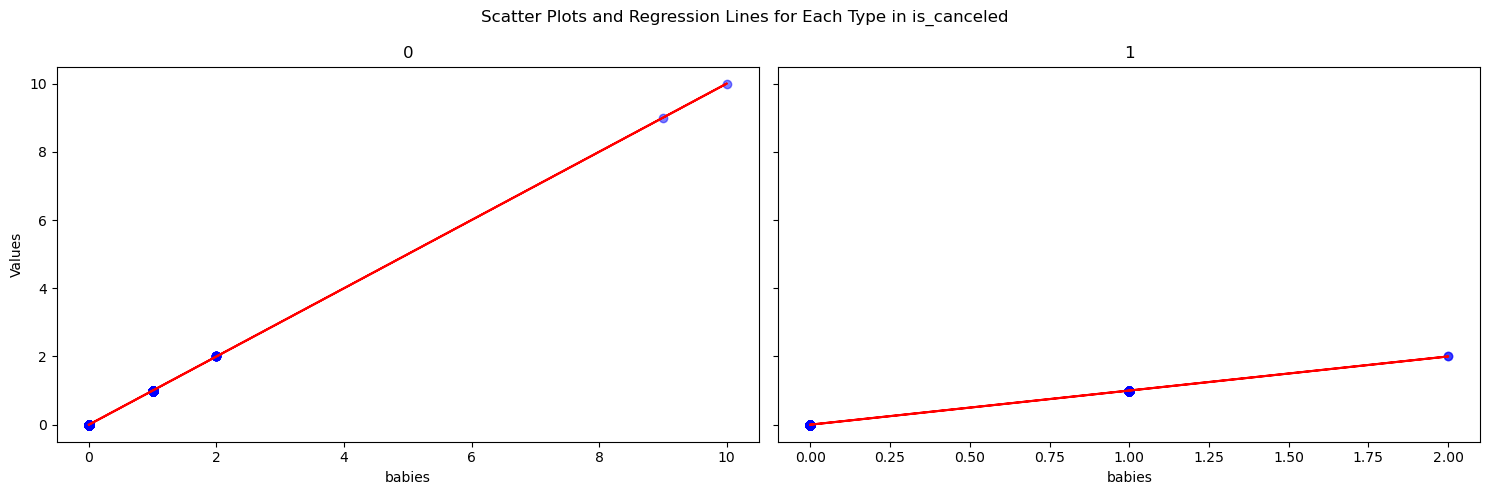

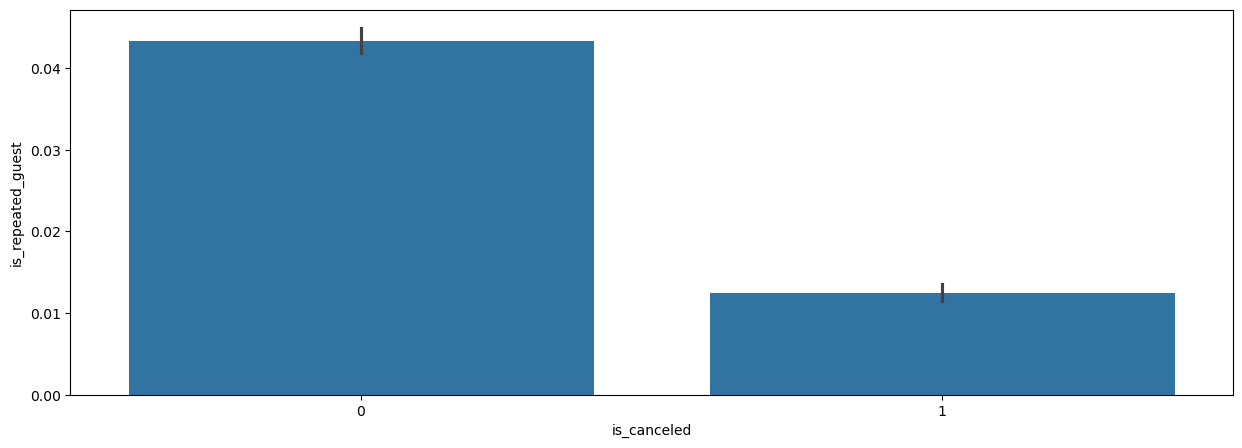

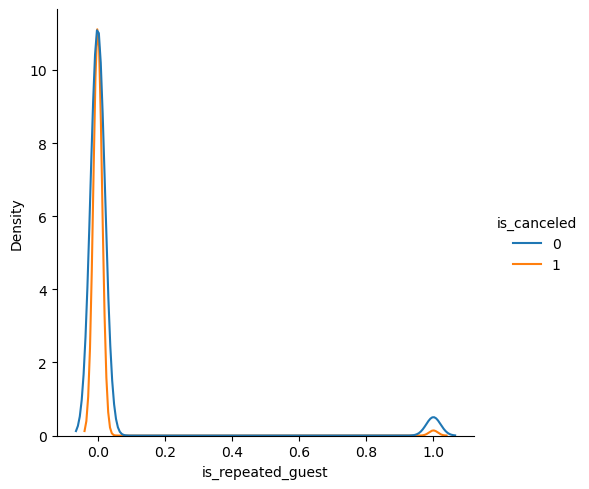

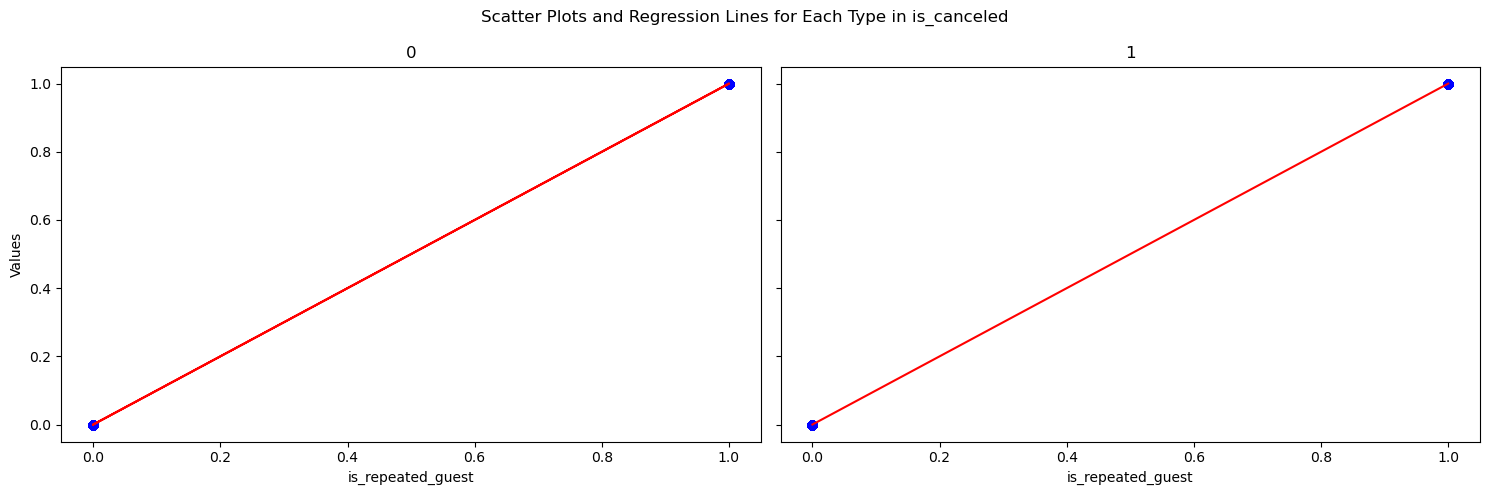

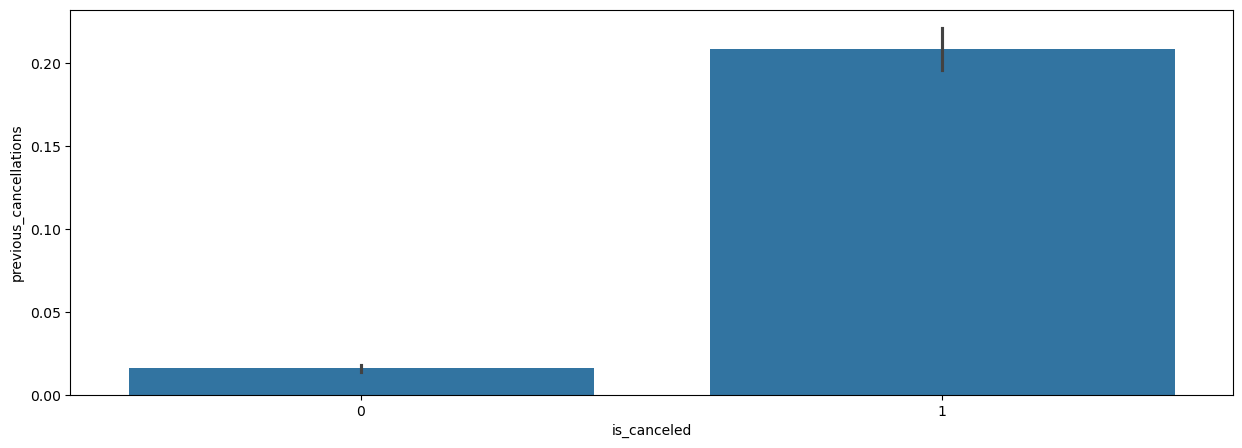

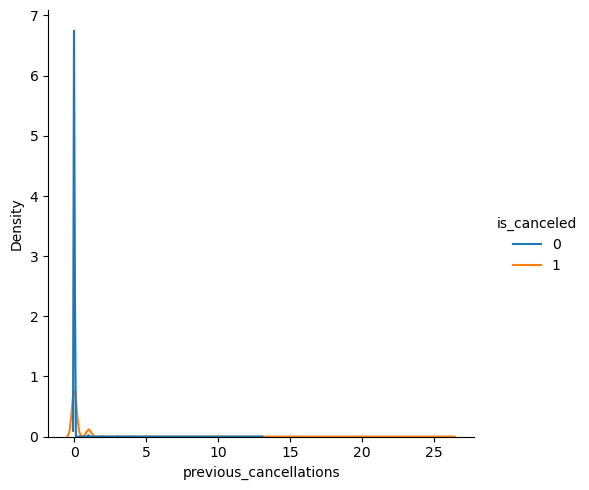

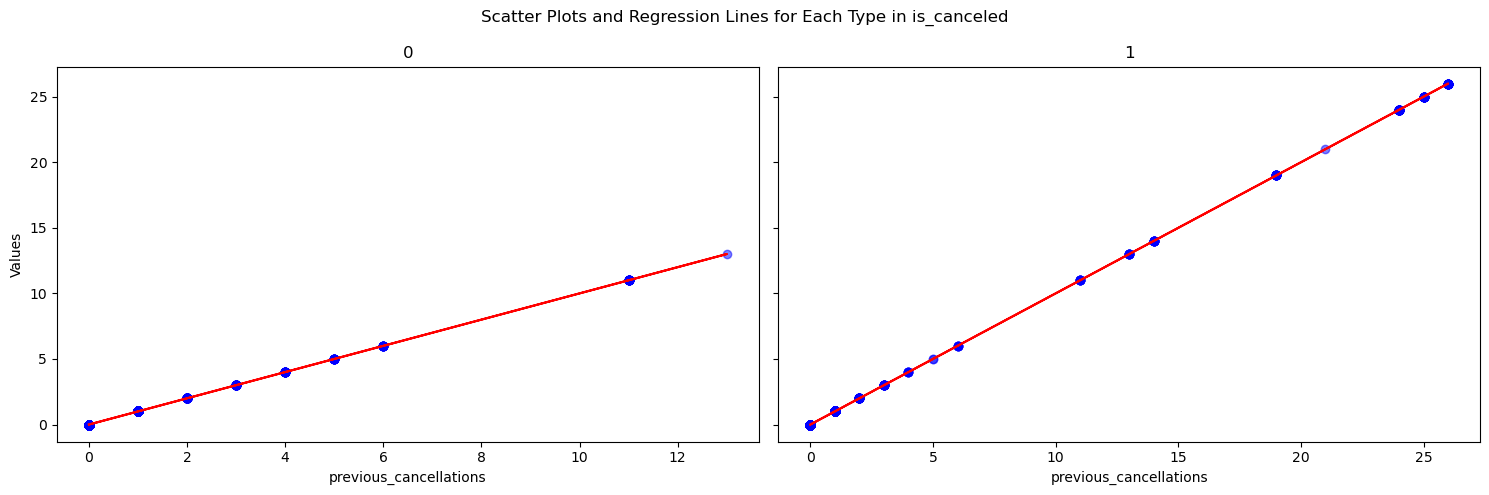

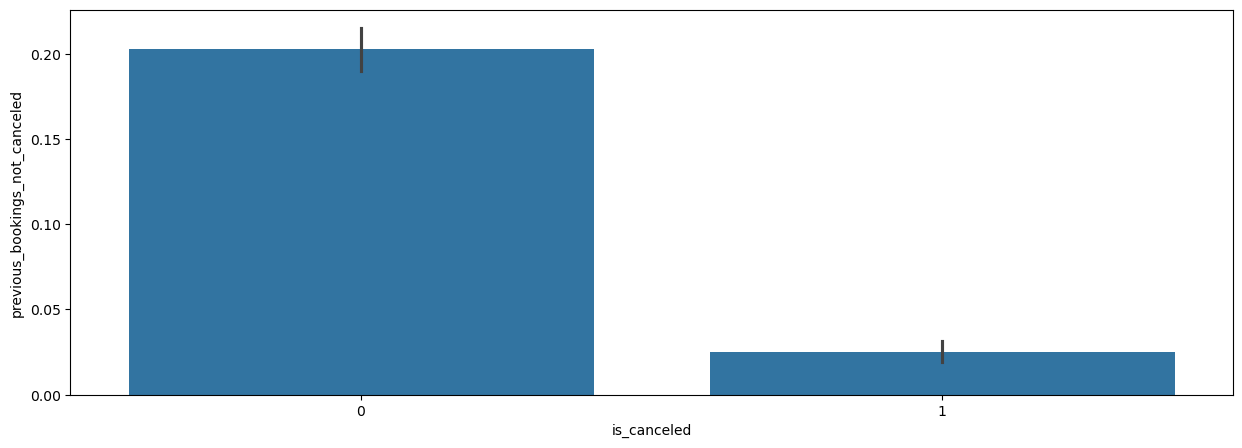

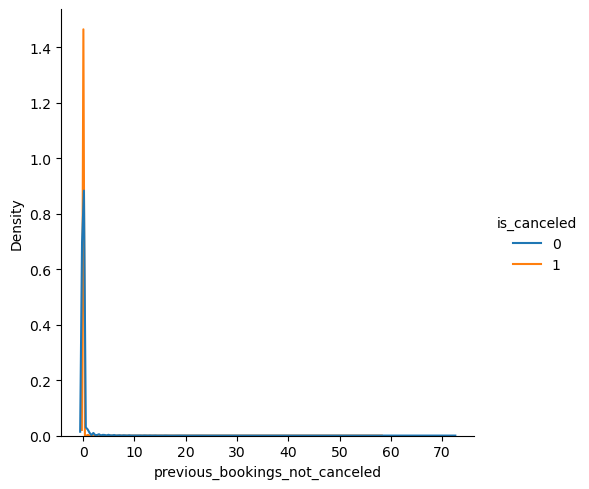

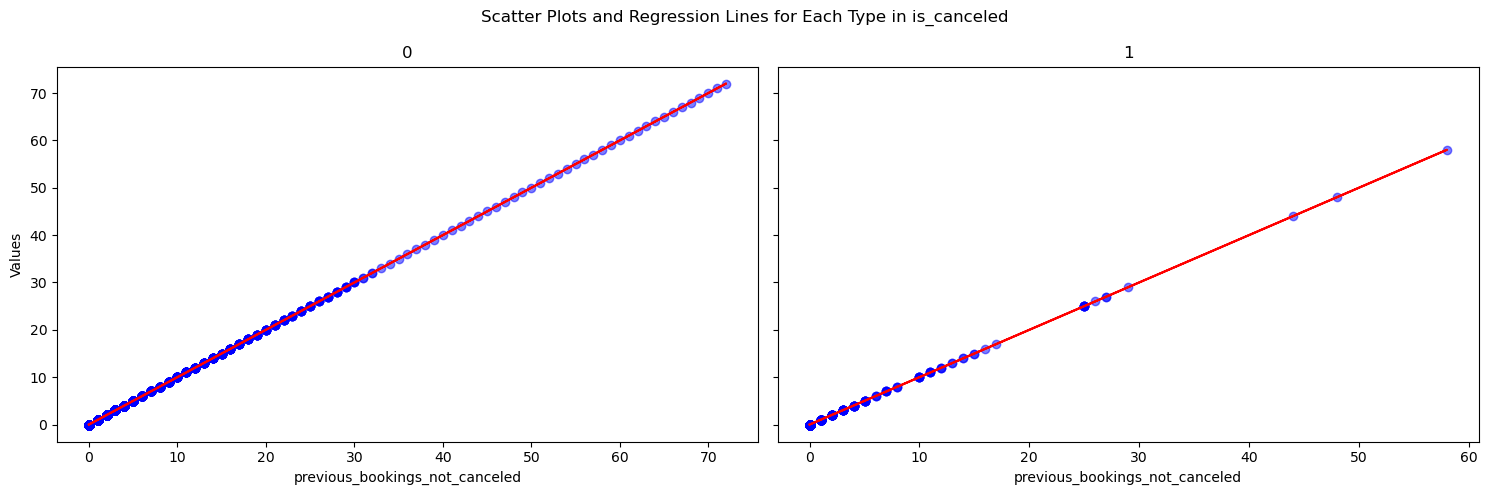

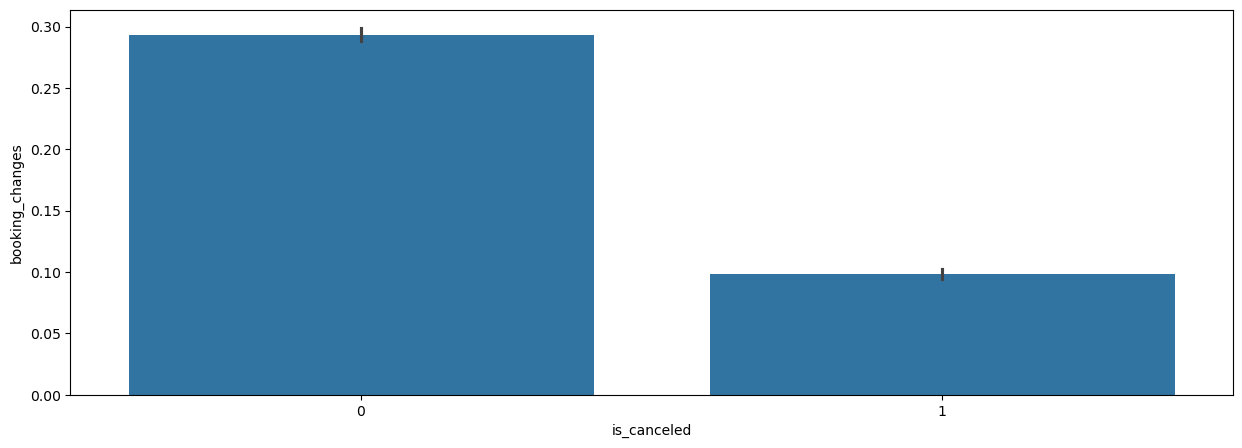

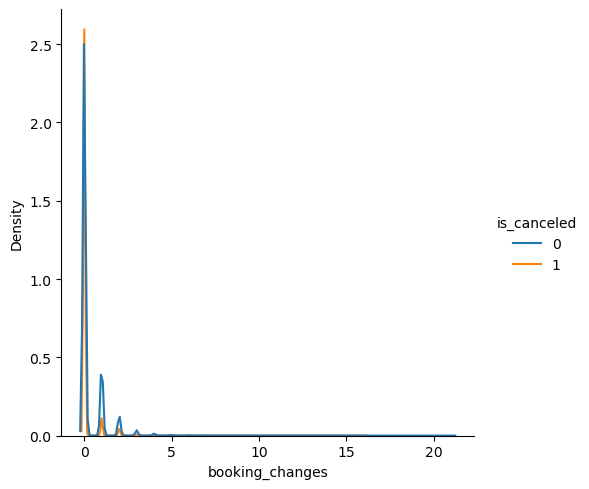

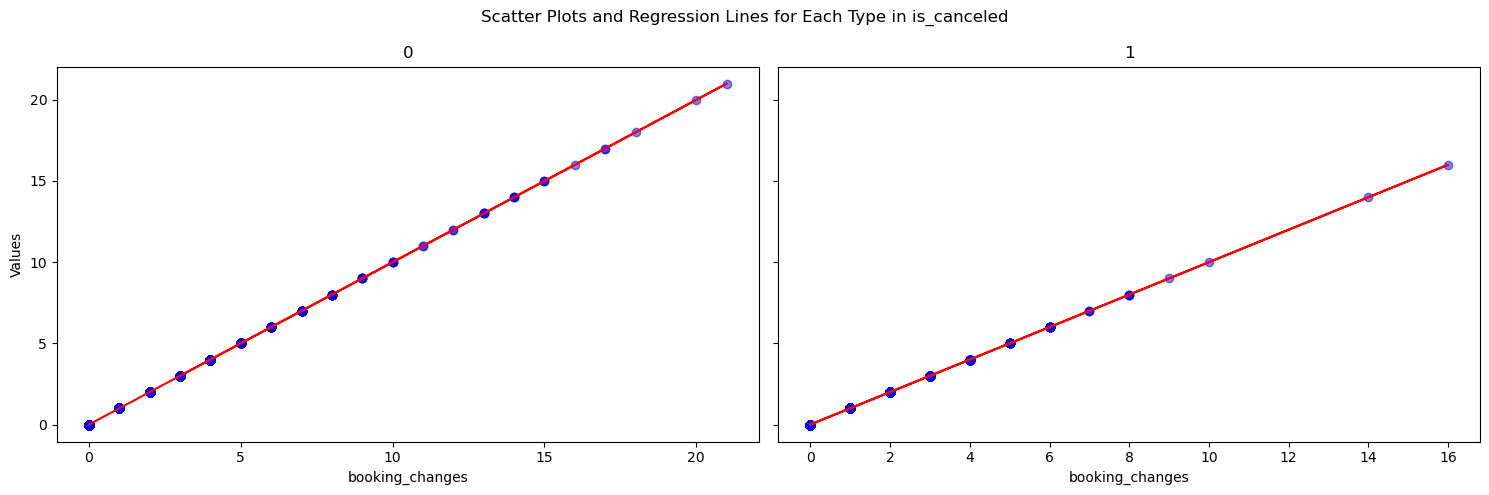

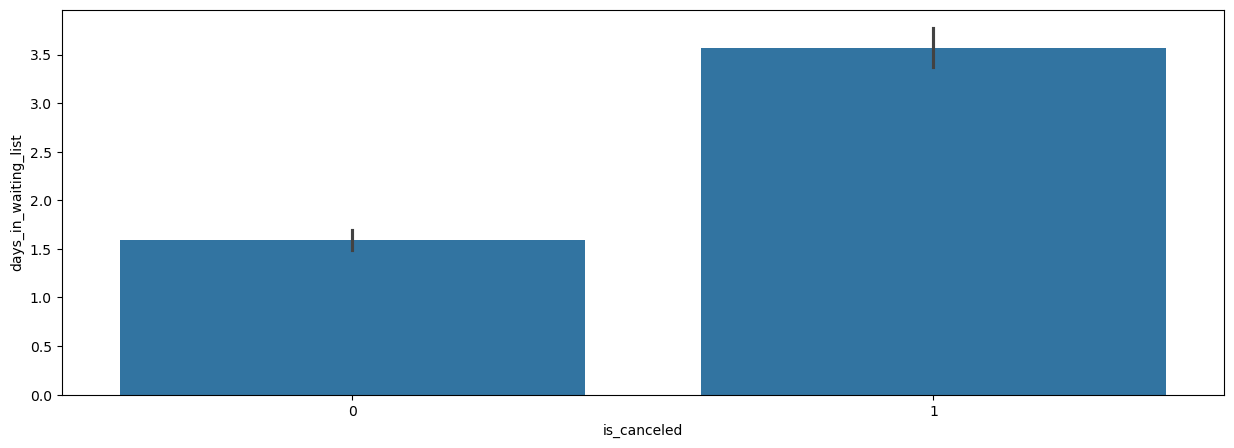

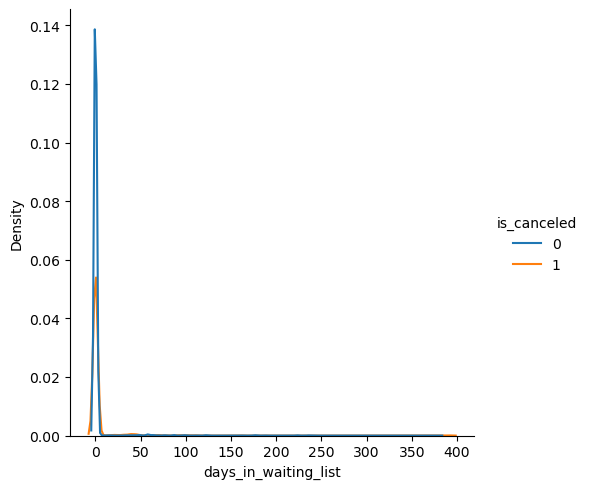

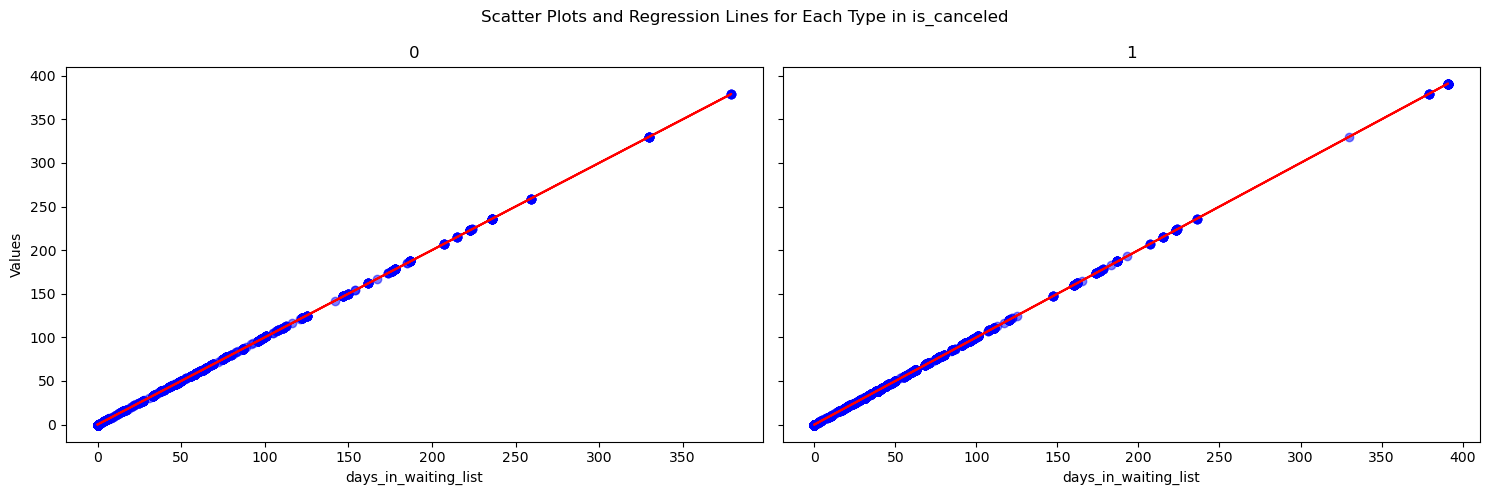

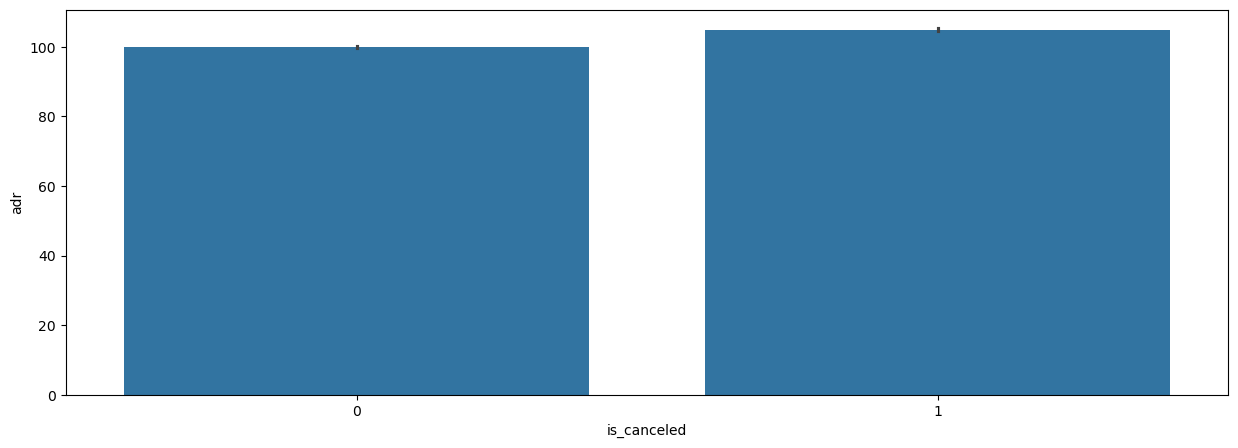

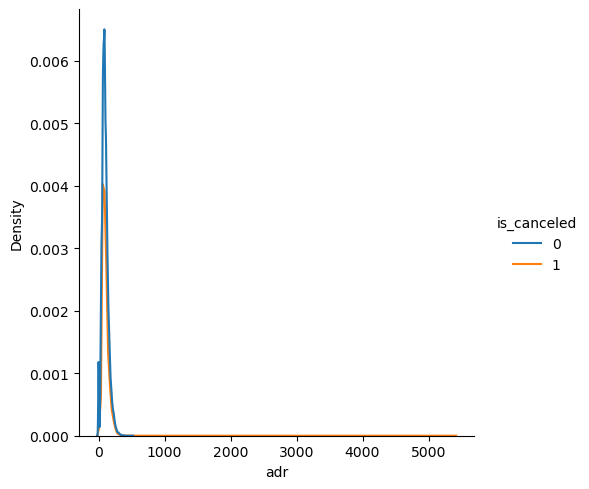

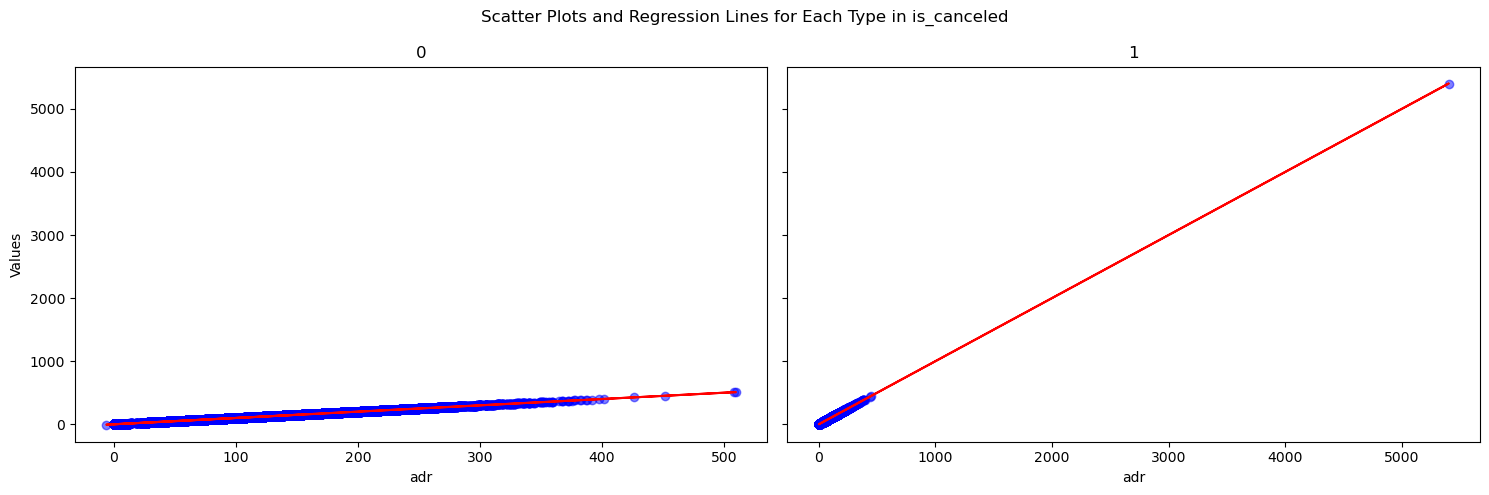

C:\Users\carlo\AppData\Local\Temp\ipykernel_30676\3713164749.py:14: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")


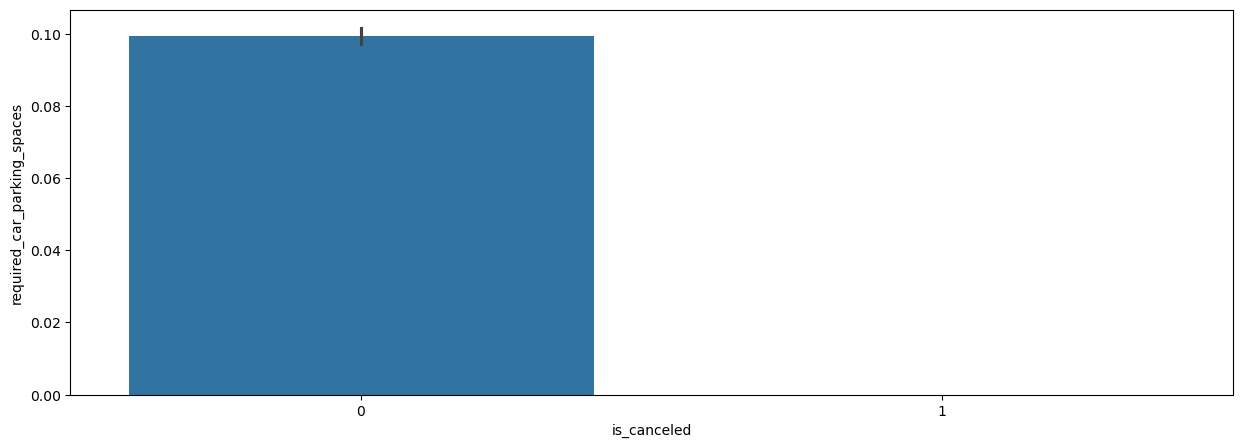

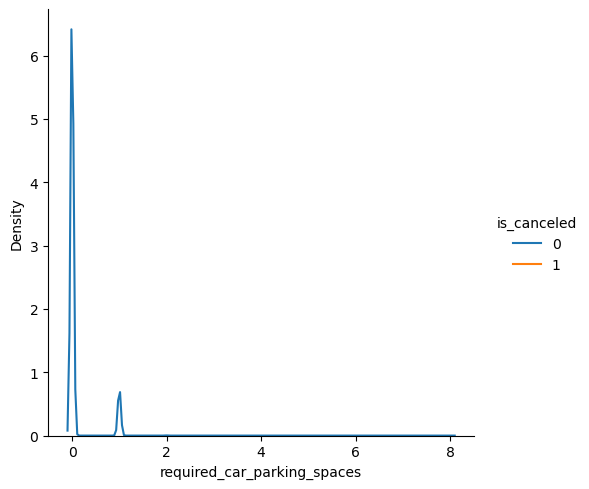

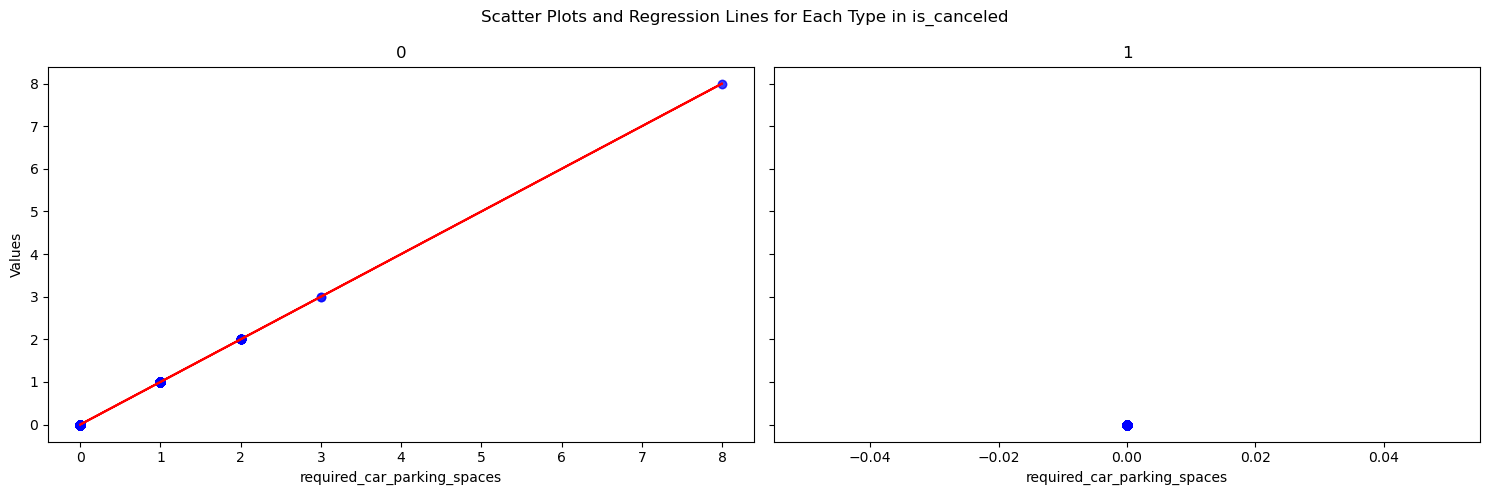

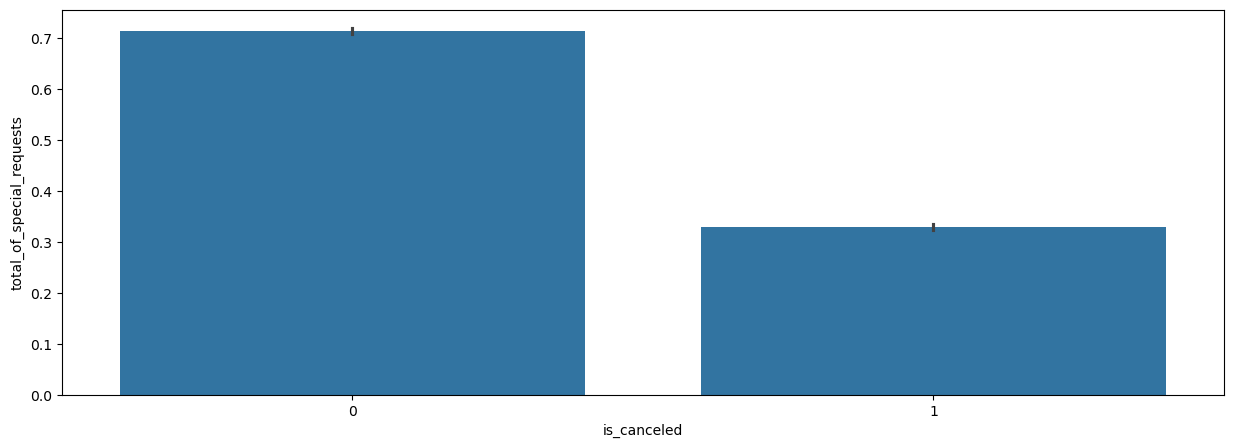

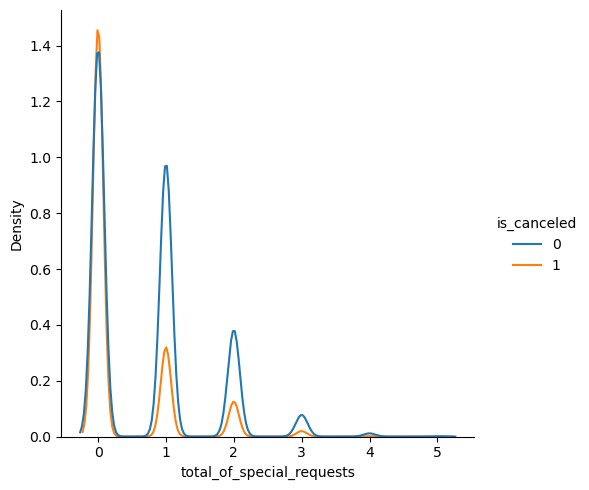

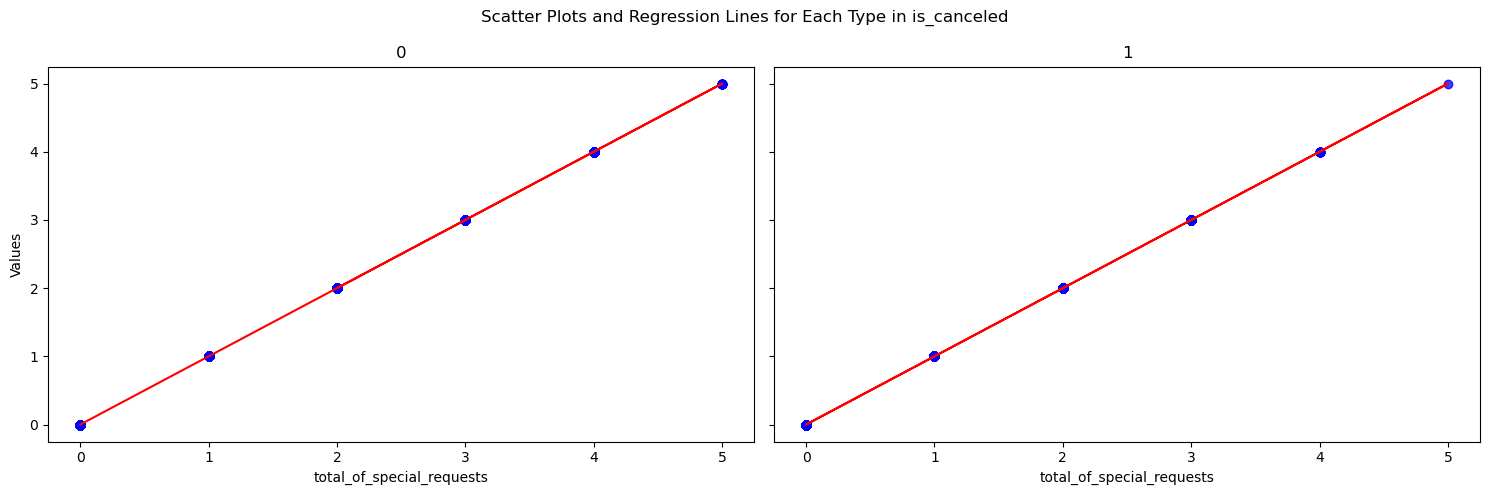

In [19]:
# Passo 2: Univariate Analysis (Distribution of individual features)
def bivariate_analysis(data, column_name):
    


    Objective_col = data.columns[1]

    # Visualization
    plt.figure(figsize=(15, 5))

    sns.barplot(data=data, x=Objective_col, y=column_name)
   # plt.savefig(f'bivariate_analysis/bar_plot_{column_name}.png')

    sns.displot(data=data, x= column_name, hue=Objective_col, kind="kde")
    #plt.savefig(f'bivariate_analysis/dis_plot_kde_{column_name}.png')

    fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=True)

    # Get unique values in the last_col (your categorical variable)
    unique_types = data[Objective_col].unique()

   
   # Loop over each unique type and perform linear regression
    for i, t in enumerate(unique_types):
        # Filter data for the current type
        subset = data[data[Objective_col] == t]
        
        X = subset[column_name].values.reshape(-1, 1)
        y = subset[column_name].values
        model = LinearRegression()
        model.fit(X, y)
        
        m = model.coef_[0]
        b = model.intercept_
        
        axes[i].scatter(X, y, color='blue', alpha=0.5)
        
        axes[i].plot(X, model.predict(X), color='red', label=f'y = {m:.2f}x + {b:.2f}')
        
        # Set the title to show the current type and regression equation
        axes[i].set_title(f'{t}')
        axes[i].set_xlabel(column_name)

    # Set the common ylabel for the whole figure
    axes[0].set_ylabel('Values')

    # Display the plot
    plt.suptitle(f'Scatter Plots and Regression Lines for Each Type in {Objective_col}')
 

    plt.tight_layout()
    #plt.savefig(f'bivariate_analysis/scatter_plot_{column_name}.png')
    plt.show()



variables_to_analyse=numerical_columns

# Realizar a análise bivariada para cada variável
for variable in variables_to_analyse:
    bivariate_analysis(data, variable)




In [18]:

def bivariate_categorical(data, varaible):
    plt.figure(figsize=(15, 15))

    sns.countplot(data=data, x=variable, hue=data['is_canceled'])
    # Add labels and title
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.title('Count of is_canceled Type by 'f'{variable}')
    plt.legend(title='Is_canceled')


    plt.show()

for variable in categorical_columns:
    bivariate_categorical(data, variable)

   


In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  int32  
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  int32  
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [14]:
X=data.drop(['is_canceled', 'reservation_status'], axis=1)

#'company', 'agent','name','email','phone-number','credit_card', 'reservation_status_date'
Y=data['is_canceled']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)


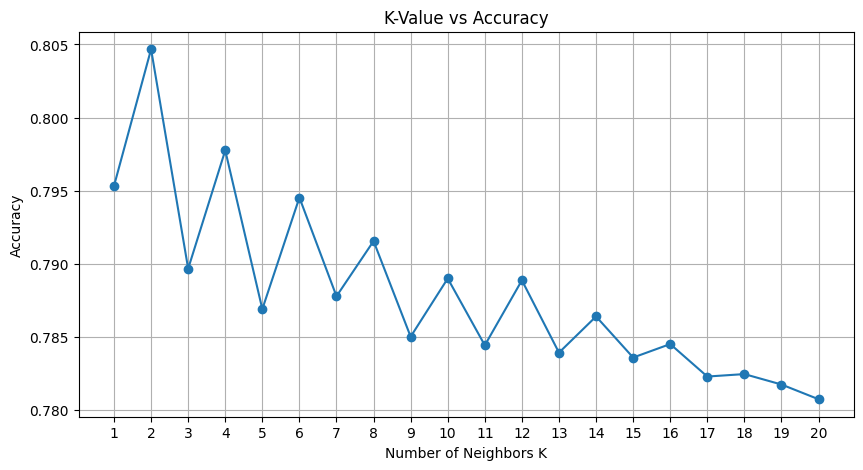

The best k value is: 2 with an accuracy of: 0.8047


In [15]:
bestk=alg.determine_best_K(X, Y)

In [22]:
# Check for unique values
unique_values = data.nunique()
print(unique_values)

hotel                                2
is_canceled                          2
lead_time                          479
arrival_date_year                    3
arrival_date_month                  12
arrival_date_week_number            53
arrival_date_day_of_month           31
stays_in_weekend_nights             17
stays_in_week_nights                35
adults                              14
children                             6
babies                               5
meal                                 5
country                            178
market_segment                       8
distribution_channel                 5
is_repeated_guest                    2
previous_cancellations              15
previous_bookings_not_canceled      73
reserved_room_type                  10
assigned_room_type                  12
booking_changes                     21
deposit_type                         3
days_in_waiting_list               128
customer_type                        4
adr                      

In [16]:
k_equals2=alg.knn_function(X, Y, 3)
k_equals4=alg.knn_function(X, Y, 5)
k_equals6=alg.knn_function(X, Y, 7)

Accuracy: 78.96808777954602

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.84      0.83     15033
           1       0.73      0.70      0.71      8845

    accuracy                           0.79     23878
   macro avg       0.78      0.77      0.77     23878
weighted avg       0.79      0.79      0.79     23878


Confusion Matrix [[12697  2336]
 [ 2686  6159]]
Accuracy: 78.69168272049586

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.84     15033
           1       0.73      0.67      0.70      8845

    accuracy                           0.79     23878
   macro avg       0.77      0.76      0.77     23878
weighted avg       0.78      0.79      0.78     23878


Confusion Matrix [[12897  2136]
 [ 2952  5893]]
Accuracy: 78.77962978473909

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.87 

In [17]:
crossval_knn5=alg.crossValidation_knn(X, Y, 5, 5)
crossval_knn10=alg.crossValidation_knn(X, Y, 10, 5)

KNN model accuracy with 5-fold cross-validation (in %): 52.19532624172879

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.55      0.59     75166
           1       0.38      0.48      0.43     44224

    accuracy                           0.52    119390
   macro avg       0.51      0.51      0.51    119390
weighted avg       0.55      0.52      0.53    119390

Confusion Matrix
 [[40968 34198]
 [22876 21348]]
KNN model accuracy with 10-fold cross-validation (in %): 51.83599966496356

Classification Report:
               precision    recall  f1-score   support

           0       0.63      0.57      0.60     75166
           1       0.37      0.44      0.40     44224

    accuracy                           0.52    119390
   macro avg       0.50      0.50      0.50    119390
weighted avg       0.54      0.52      0.52    119390

Confusion Matrix
 [[42473 32693]
 [24810 19414]]


In [18]:
bootstrap_knn3=alg.bootstrap_knn(X_train, Y_train, X_test, Y_test, 100, 5)


c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Bootstrap Mean Accuracy: 81.32%
Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.33      0.45     22478
           1       0.41      0.80      0.54     13339

    accuracy                           0.50     35817
   macro avg       0.57      0.56      0.50     35817
weighted avg       0.61      0.50      0.48     35817

Bootstrap Mean Accuracy:
 [[ 7308 15170]
 [ 2693 10646]]


In [19]:
over_under_samples_knn=alg.oversample_undersample_knn(X, Y, 5)

c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 76.58095317865818
Classification Report (Oversampled):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81     22478
           1       0.67      0.74      0.70     13339

    accuracy                           0.77     35817
   macro avg       0.75      0.76      0.75     35817
weighted avg       0.77      0.77      0.77     35817

Confusion Matrix (Oversampled):
 [[17519  4959]
 [ 3429  9910]]


c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 76.49161012926822
Classification Report (Oversampled):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80     22478
           1       0.66      0.75      0.70     13339

    accuracy                           0.76     35817
   macro avg       0.75      0.76      0.75     35817
weighted avg       0.77      0.76      0.77     35817

Confusion Matrix (Oversampled):
 [[17356  5122]
 [ 3298 10041]]


In [20]:
holdout_NB=alg.NB_function(X, Y)

Accuracy: 57.17675963927744

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.37      0.52     22478
           1       0.46      0.91      0.61     13339

    accuracy                           0.57     35817
   macro avg       0.67      0.64      0.57     35817
weighted avg       0.72      0.57      0.56     35817


Confusion Matrix
 [[ 8352 14126]
 [ 1212 12127]]


In [21]:
crossval_NB5=alg.crossValidation_NB(X, Y, 5)
crossval_NB10=alg.crossValidation_NB(X, Y, 10)

KNN model accuracy with 5-fold cross-validation (in %): 47.74771756428512

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.21      0.34     75166
           1       0.41      0.93      0.57     44224

    accuracy                           0.48    119390
   macro avg       0.62      0.57      0.45    119390
weighted avg       0.67      0.48      0.42    119390

Confusion Matrix
 [[16047 59119]
 [ 3265 40959]]
KNN model accuracy with 10-fold cross-validation (in %): 46.74093307647206

Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.17      0.29     75166
           1       0.41      0.97      0.57     44224

    accuracy                           0.47    119390
   macro avg       0.66      0.57      0.43    119390
weighted avg       0.72      0.47      0.39    119390

Confusion Matrix
 [[12827 62339]
 [ 1247 42977]]


In [22]:
bootstrap_NB=alg.bootstrap_NB(X_train, Y_train, X_test, Y_test, 100)

c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GaussianNB was fitted without feature names
  warnings.warn(


Bootstrap Mean Accuracy: 47.10%
Classification Report:
               precision    recall  f1-score   support

           0       0.63      1.00      0.77     22478
           1       0.00      0.00      0.00     13339

    accuracy                           0.63     35817
   macro avg       0.31      0.50      0.39     35817
weighted avg       0.39      0.63      0.48     35817

Bootstrap Mean Accuracy:
 [[22478     0]
 [13339     0]]


c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [27]:
over_under_samples_NB=alg.oversample_undersample_NB(X, Y)

c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 76.58095317865818
Classification Report (Oversampled):
               precision    recall  f1-score   support

           0       0.84      0.78      0.81     22478
           1       0.67      0.74      0.70     13339

    accuracy                           0.77     35817
   macro avg       0.75      0.76      0.75     35817
weighted avg       0.77      0.77      0.77     35817

Confusion Matrix (Oversampled):
 [[17519  4959]
 [ 3429  9910]]


c:\Users\Vasco\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


Accuracy: 76.49161012926822
Classification Report (Undersampled):
               precision    recall  f1-score   support

           0       0.84      0.77      0.80     22478
           1       0.66      0.75      0.70     13339

    accuracy                           0.76     35817
   macro avg       0.75      0.76      0.75     35817
weighted avg       0.77      0.76      0.77     35817

Confusion Matrix (Undersampled):
 [[17356  5122]
 [ 3298 10041]]


In [23]:

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score
from Algoritmos import majority_voting_classifiers

# Define classifiers
classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('gnb', GaussianNB()),
    ('logreg', LogisticRegression())
]
# Apply majority voting classifiers
y_pred = majority_voting_classifiers(X, Y, classifiers)



c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7723427422732222
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.80      0.82     15033
           1       0.68      0.73      0.70      8845

    accuracy                           0.77     23878
   macro avg       0.76      0.76      0.76     23878
weighted avg       0.78      0.77      0.77     23878



In [24]:
from Algoritmos import weighted_majority_voting_classifiers

# Define classifiers with weights
classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('gnb', GaussianNB()),
    ('logreg', LogisticRegression())
]


# Apply weighted majority voting classifiers
y_pred_weighted = weighted_majority_voting_classifiers(X, Y, classifiers)

# Print the predictions
print(y_pred_weighted)

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7731384538068515
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.76      0.81     15033
           1       0.66      0.79      0.72      8845

    accuracy                           0.77     23878
   macro avg       0.76      0.78      0.76     23878
weighted avg       0.79      0.77      0.78     23878

0.7731384538068515


In [25]:
from Algoritmos import stacking_logistic_regression

# Define base classifiers
base_classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('gnb', GaussianNB()),
    ('logreg', LogisticRegression())
]

# Use the stacking_with_logistic_regression function
stacking_model = stacking_logistic_regression(X, Y, base_classifiers)

# Print the stacking model
print(stacking_model)

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7896808777954603
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     15033
           1       0.73      0.70      0.71      8845

    accuracy                           0.79     23878
   macro avg       0.78      0.77      0.77     23878
weighted avg       0.79      0.79      0.79     23878

0.7896808777954603


In [26]:
from Algoritmos import stacking_svc

# Define base classifiers
base_classifiers = [
    ('knn', KNeighborsClassifier(n_neighbors=3)),
    ('gnb', GaussianNB()),
    ('logreg', LogisticRegression())
]

# Use the stacking_svm function
stacking_model_svm = stacking_svc(X, Y, base_classifiers)

# Print the stacking model
print(stacking_model_svm)

c:\Users\carlo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Accuracy: 0.7896808777954603
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.84      0.83     15033
           1       0.73      0.70      0.71      8845

    accuracy                           0.79     23878
   macro avg       0.78      0.77      0.77     23878
weighted avg       0.79      0.79      0.79     23878

0.7896808777954603


In [35]:
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


# Initialize the BaggingClassifier with a DecisionTreeClassifier as the base estimator
bagging_clf = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)

# Fit the BaggingClassifier on the training data
bagging_clf.fit(X_train, y_train)

# Make predictions on the test set
y_pred_bagging = bagging_clf.predict(X_test)

# Print the classification report
print(classification_report(y_test, y_pred_bagging))

              precision    recall  f1-score   support

           0       0.90      0.93      0.91     14907
           1       0.87      0.83      0.85      8971

    accuracy                           0.89     23878
   macro avg       0.89      0.88      0.88     23878
weighted avg       0.89      0.89      0.89     23878

